# Campaña de Marketing Bancario

**Comprensión empresarial**

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

**Descripción del problema**

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

# Exploratory Data Analysis (EDA)

0. Importar librerías

In [1]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import math
import json

import pickle

### 1. Carga de información

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Exploración y limpieza

**2.1. Comprensión de datos**

In [ ]:
print(f'El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataframe contiene 41188 filas y 21 columnas.


**2.2. Identificando nulos y duplicados**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* `age`. Edad del cliente (numérico)  
* `job`. Tipo de trabajo (categórico)  
* `marital`. Estado civil (categórico)  
* `education`. Nivel de educación (categórico)  
* `default`. ¿Tiene crédito actualmente? (categórico)  
* `housing`. ¿Tiene un préstamo de vivienda? (categórico)  
* `loan`. ¿Tiene un préstamo personal? (categórico)  
* `contact`. Tipo de comunicación de contacto (categórico)  
* `month`. Último mes en el que se le ha contactado (categórico)  
* `day_of_week`. Último día en el que se le ha contactado (categórico)  
* `duration`. Duración del contacto previo en segundos (numérico)  
* `campaign`. Número de contactos realizados durante esta campaña al cliente (numérico)  
* `pdays`. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
* `previous`. Número de contactos realizados durante la campaña anterior al cliente (numérico)  
* `poutcome`. Resultado de la campaña de marketing anterior (categórico)  
* `emp.var.rate`. Tasa de variación del empleo. Indicador trimestral (numérico)  
* `cons.price.idx`. Índice de precios al consumidor. Indicador mensual (numérico)  
* `cons.conf.idx`. Índice de confianza del consumidor. Indicador mensual (numérico)  
* `euribor3m`. Tasa EURIBOR 3 meses. Indicador diario (numérico)  
* `nr.employed`. Número de empleados. Indicador trimestral (numérico)  
* `y`. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)  



* Hay 41188  filas que corresponden a cada cliente del banco
* Los datos cuentan con 10 características numéricas y 11 características categóricas.

In [3]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

**2.3. Eliminando información irrelevante**

Debido a que no hay nulos, ni duplicados no se elimina información. Ademas el dataframe no cuenta con una columna de ID que debamos eliminar

### 3. Análisis univariante

**3.1. Dividir el Dataset en categoricos y numericos**

In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
df_copy = df.copy()

**3.2. Análisis sobre variables categóricas**

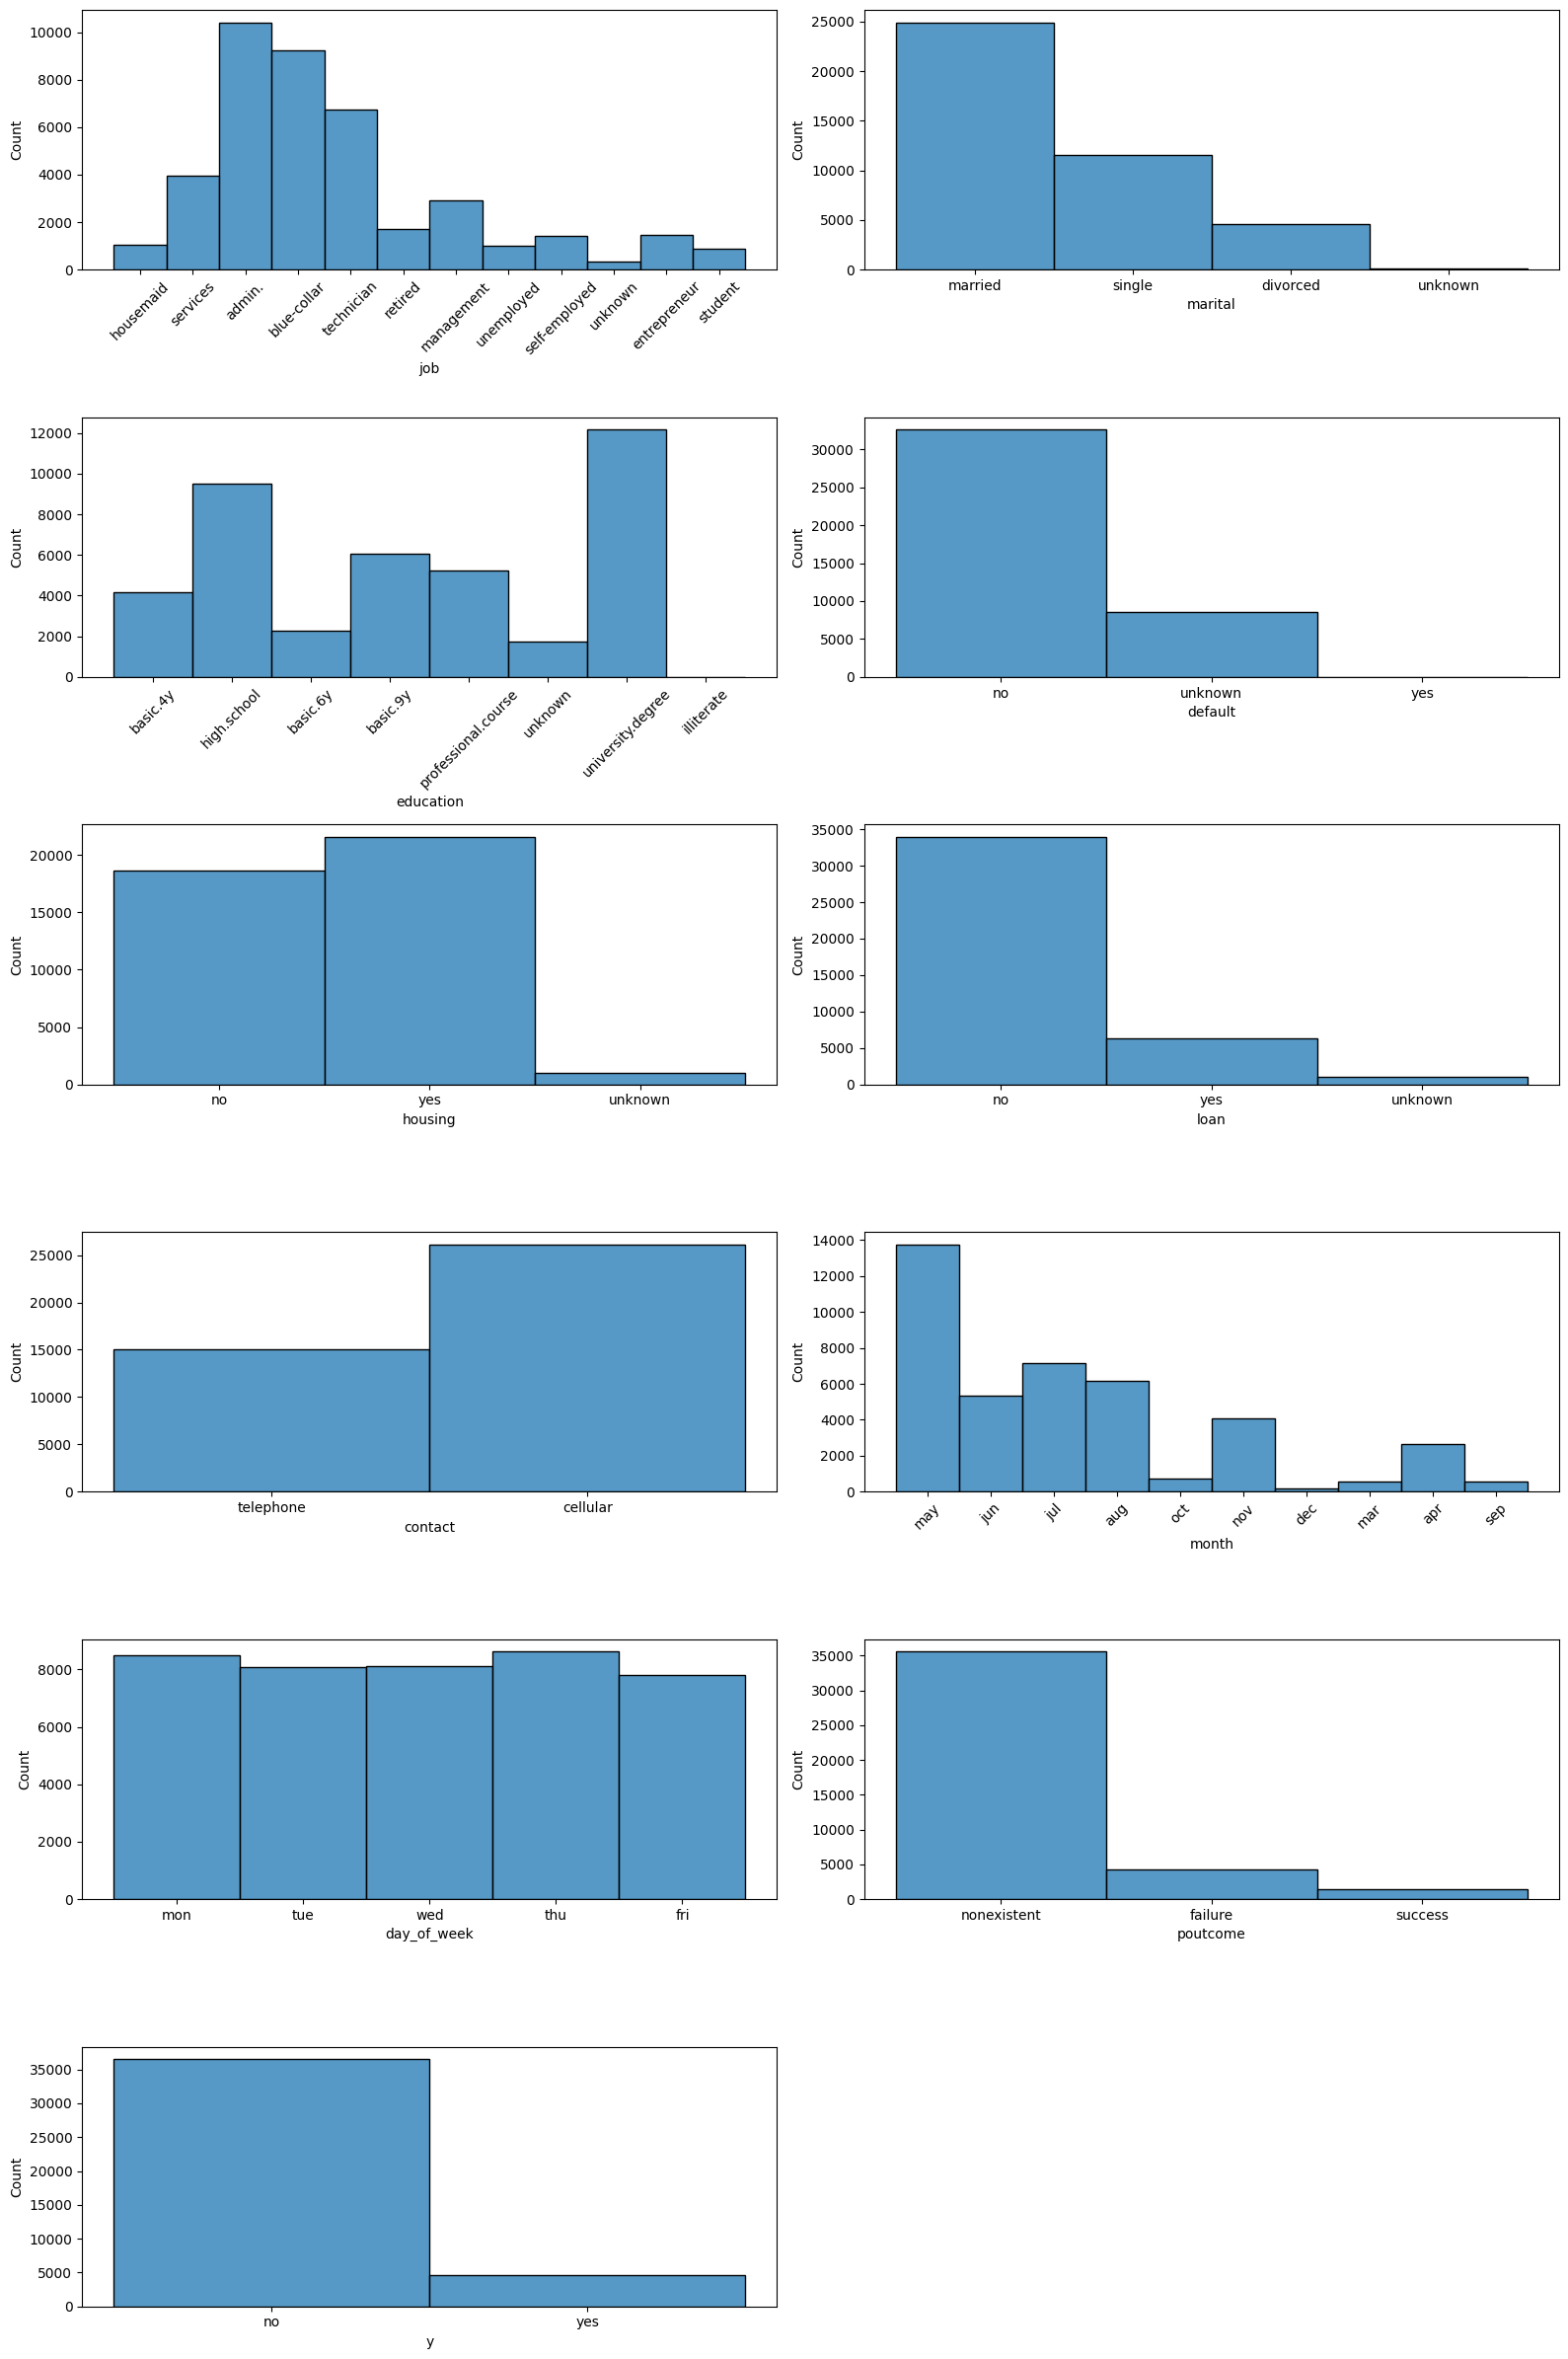

In [6]:
info_data = df_copy.dtypes
categorical_column = [col for col in info_data.index if info_data[col] == "object" or info_data[col] == "category"]

# Ajustes para la visualización de filas y columnas de gráficos
n = len(categorical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

# Ajustar que el axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for index, name_col in enumerate(categorical_column):
    r, c = divmod(index, n_cols)
    sns.histplot(ax = axis[r, c], data=df_copy, x = name_col)
    if len(df_copy[name_col].unique()) > 5:
        axis[r, c].tick_params(axis='x', rotation=45)

# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, n_rows * n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axis[r, c])


plt.tight_layout()
plt.show()

* **Trabajo**: La mayoría de los clientes son trabajadores de administrativos, obreros y técnicos.
* **Estado civil**: La mayor proporción es la de casados superando por el doble a la de solteros.
* **Educación**: La mayoría de los clientes  título universitario, seguido de ello tienen educación secundaria o superior.
* **Default**: La mayoría de los clientes no tienen crédito.
* **Préstamo de vivienda**: La mayoría de los clientes tienen un préstamo de vivienda, pero contrasta muy poco con los que no.
* **Préstamo personal**: La mayoría de los clientes no tienen un préstamo personal y muy pocos en relación si lo tienen.
* **Contacto**: La mayoría de los clientes son contactados por teléfono móvil y casi la mitad de su proporción son por telefono fijo.
* **Mes**: La mayoría de los contactos se realizan en mayo, seguido de una agrupación por los meses de verano.
* **Día de la semana**: La mayoría de los contactos se realizan los lunes o jueves pero parece ser muy parejo en toda la semana.
* **Resultado**: La mayoría de los clientes no fueron contactados en la campaña anterior
* **Y (Objetivo)**: La mayoría de los clientes no contratan un depósito a largo plazo.


**3.3. Análisis sobre variables numéricas**

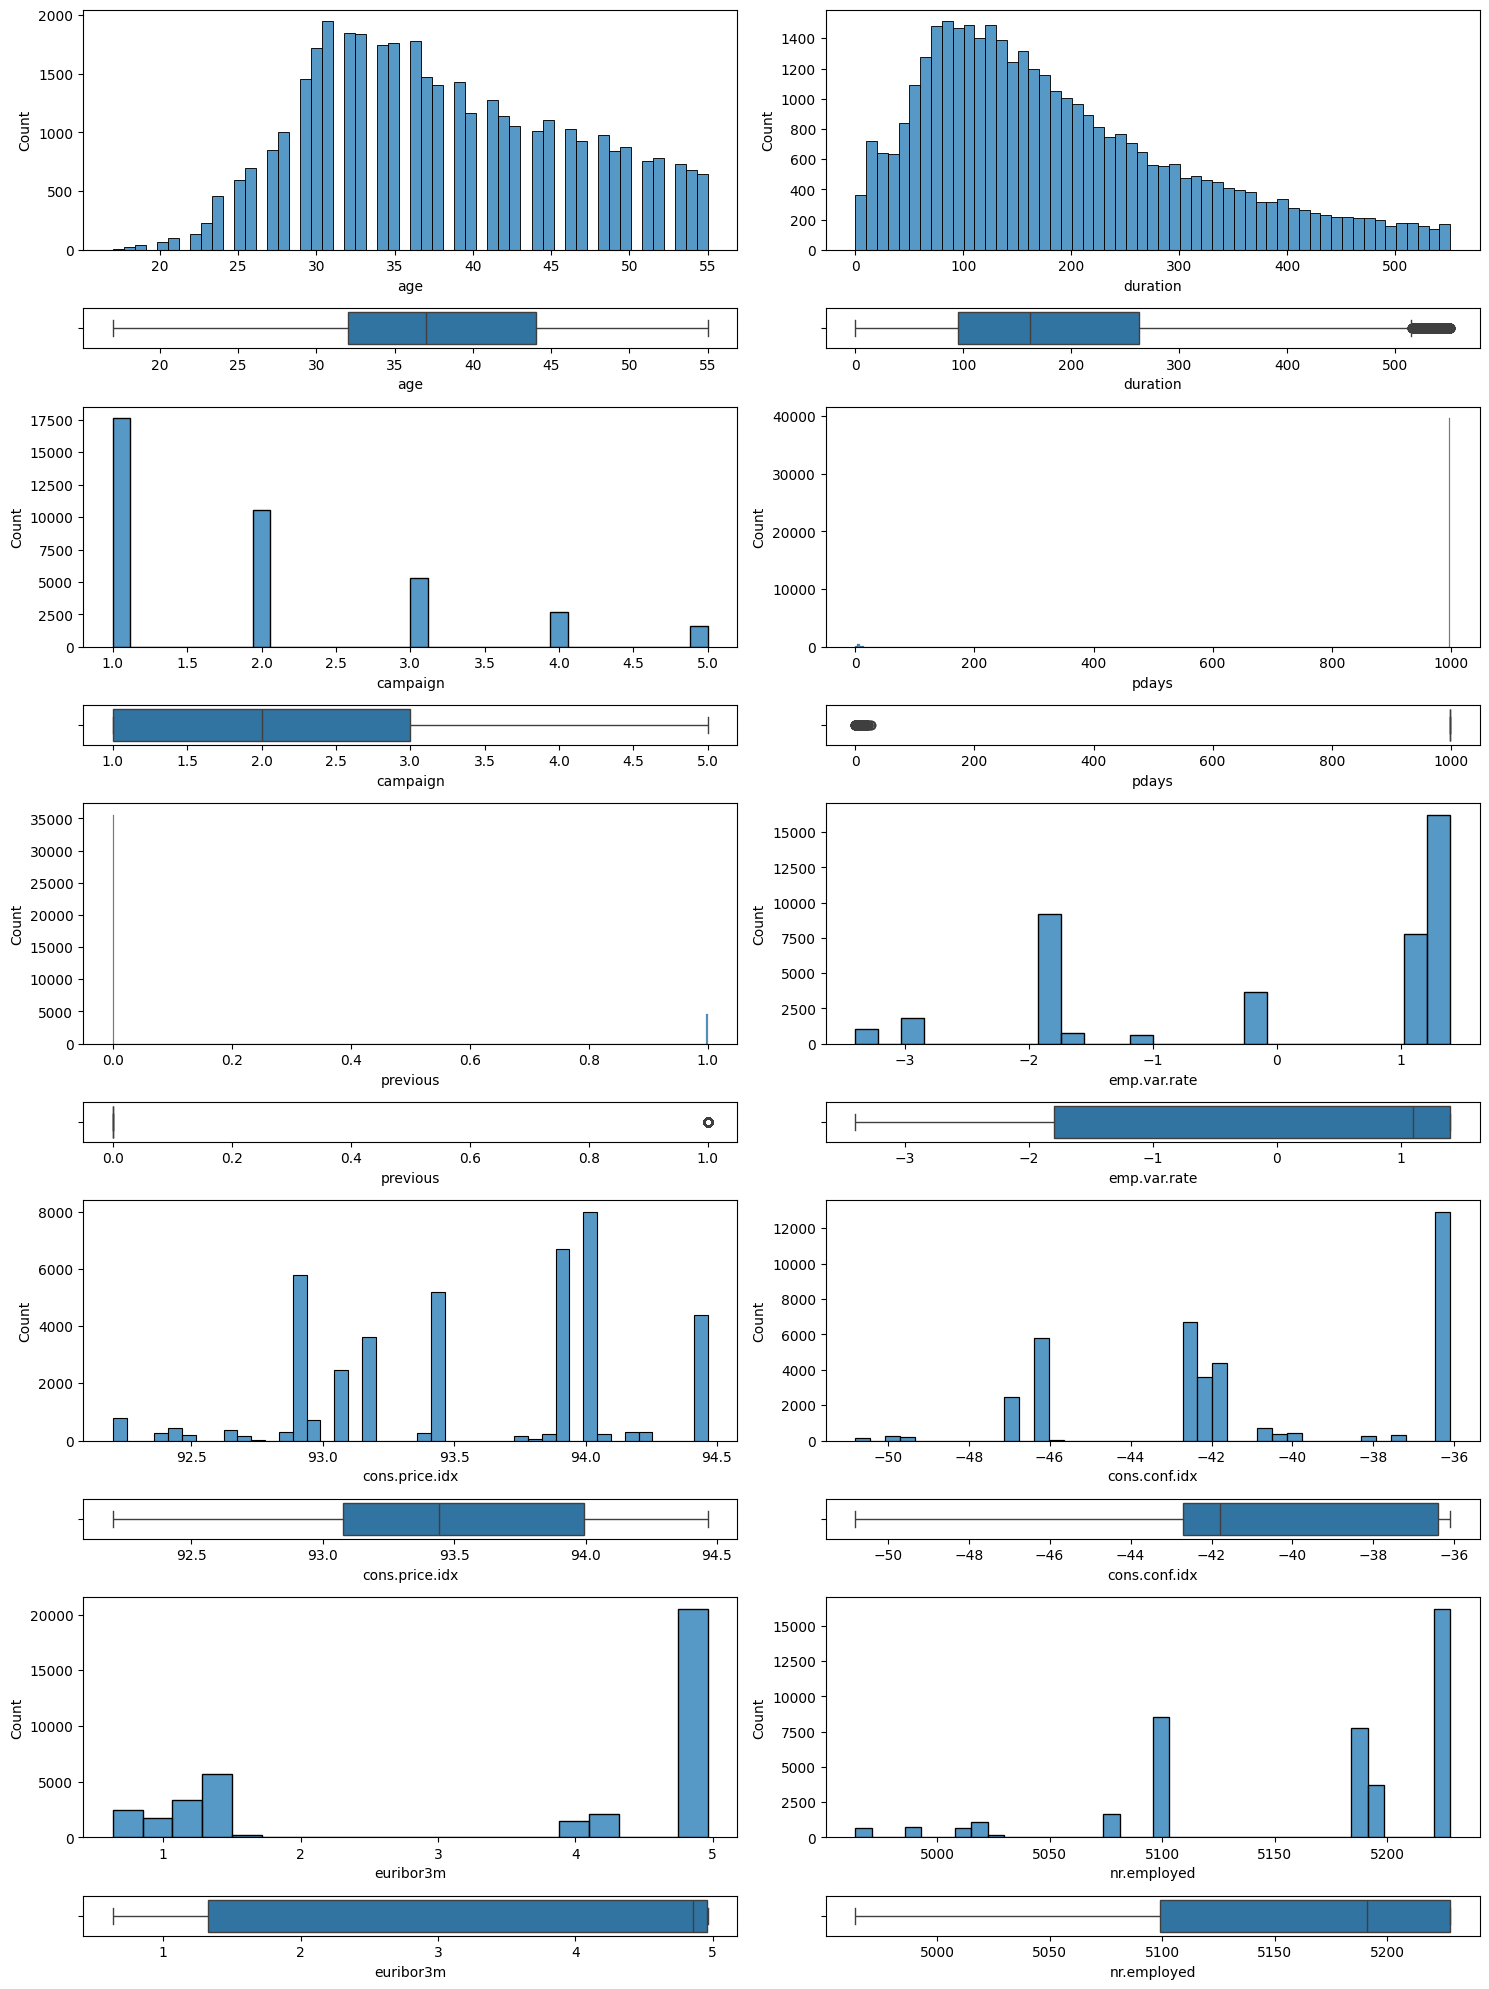

In [7]:
# Identificar columnas numéricas
numerical_column = [col for col in info_data.index if info_data[col] == "int64" or info_data[col] == "float64"]

n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = df_copy[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()
plt.show()

* **Distribuciones Asimétricas a la Derecha**:
Variables como  `campaign` y `previous` presentan distribuciones asimétricas a la derecha (right-skewed), donde la mayoría de los valores se concentran en el rango bajo y existen pocos valores extremos altos. Esto indica que la mayoría de los clientes tienen pocas campañas previas y durante las campañas.

* **Distribuciones Aproximadamente Normales**:
Variables como `age`y `duration` muestran distribuciones más simétricas y centradas, similares a una distribución normal. Esto sugiere que la edad y la duración del contacto de los clientes están más equilibrados alrededor de un valor central, con menos valores extremos.

* **Presencia de Outliers**:
Los boxplots revelan la existencia de valores atípicos (outliers) en casi todas las variables, especialmente en `duration`, `pdays` y `previous`. 

* **Valores Cero o Constantes**:
Algunas variables, como `pdays` y `previous`, tienen una gran cantidad de valores en cero, lo que puede indicar que muchos clientes no han sido contactados en campañas anteriores o no tienen historial previo.


### 4. Análisis multivariante

**4.1. Codificación de valor categorico - numericos**

In [37]:
def plot_numerical_analisis(column, numerical_column, name = None, column_info = False):
    
    if name is None:
        name = column

    columna_n = f"{column}_n"
    df_plot = df_copy.copy()
    df_plot[columna_n] = pd.factorize(df_plot[column])[0]

    if column_info:
        print(df_plot[[columna_n, column]].drop_duplicates())

    n = len(numerical_column)
    n_cols = 2
    n_rows = math.ceil(n / n_cols) * 2

    fig, axis = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))

    axis = np.array(axis)
    if axis.ndim == 1:
        axis = axis.reshape(-1, n_cols)

    for idx, col in enumerate(numerical_column):
        limite = df_plot[col].quantile(0.90)
        datos_filtrados = df_plot[df_plot[col] <= limite]

        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1

        sns.regplot(ax=axis[row_hist, col_pos], data=datos_filtrados, x=col, y=columna_n).set(ylabel=name)
        sns.heatmap(
            datos_filtrados[[col, columna_n]].corr()
            .rename(columns={columna_n: name}, index={columna_n: name}),
            annot=True, fmt=".2f", ax=axis[row_box, col_pos], cbar=False)
        

    for idx in range(n, (n_rows // 2) * n_cols):
        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1
        fig.delaxes(axis[row_hist, col_pos])
        fig.delaxes(axis[row_box, col_pos])

    plt.tight_layout()
    plt.show()

       contact_n    contact
0              0  telephone
12357          1   cellular


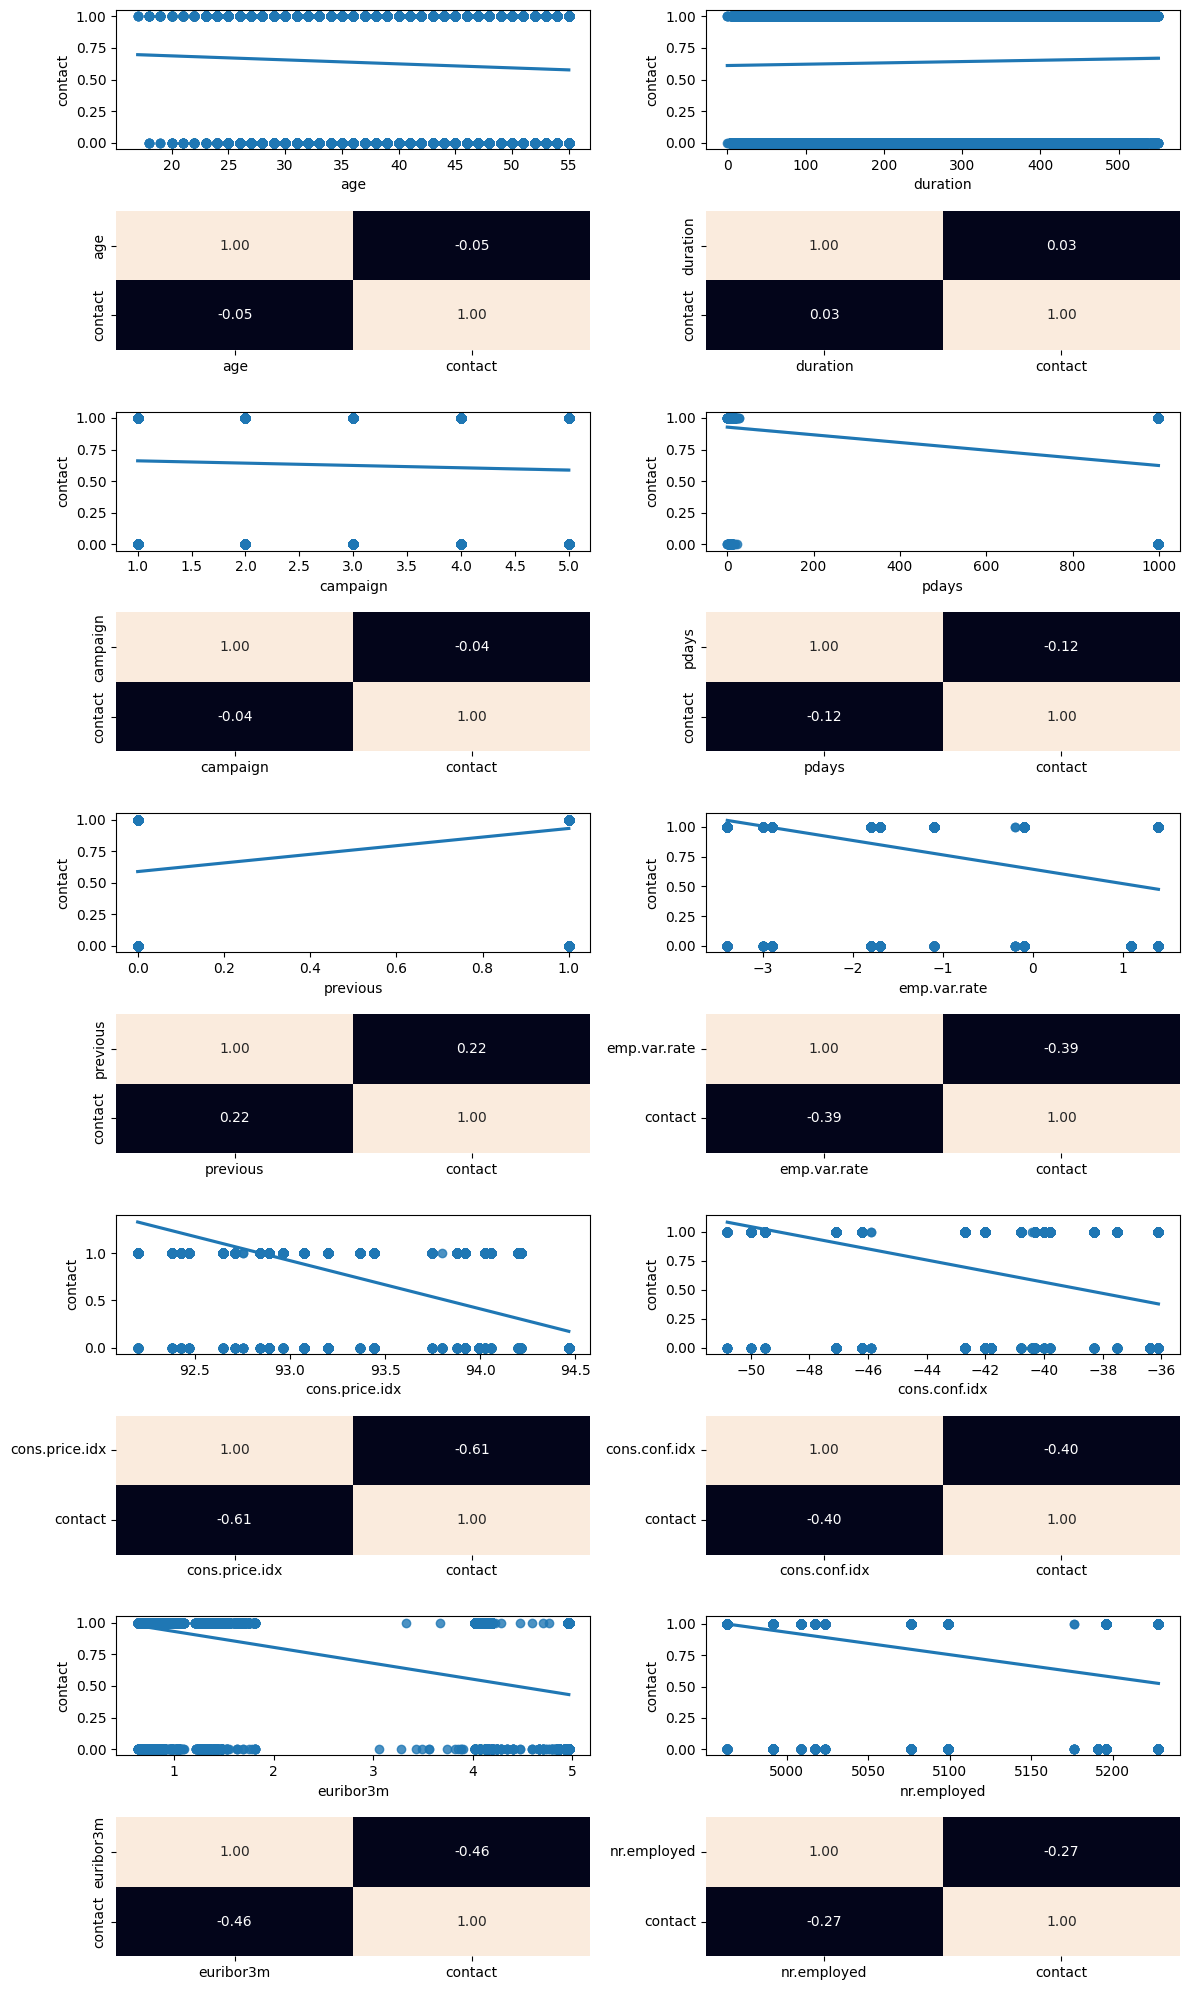

In [38]:
plot_numerical_analisis("contact", numerical_column, column_info=True)

Sobre el tipo de contacto no parece influir de manera significativa en las características numéricas de los clientes ni en los factores económicos. Es un factor independiente del resto de datos.

       poutcome_n     poutcome
0               0  nonexistent
24013           1      failure
24108           2      success


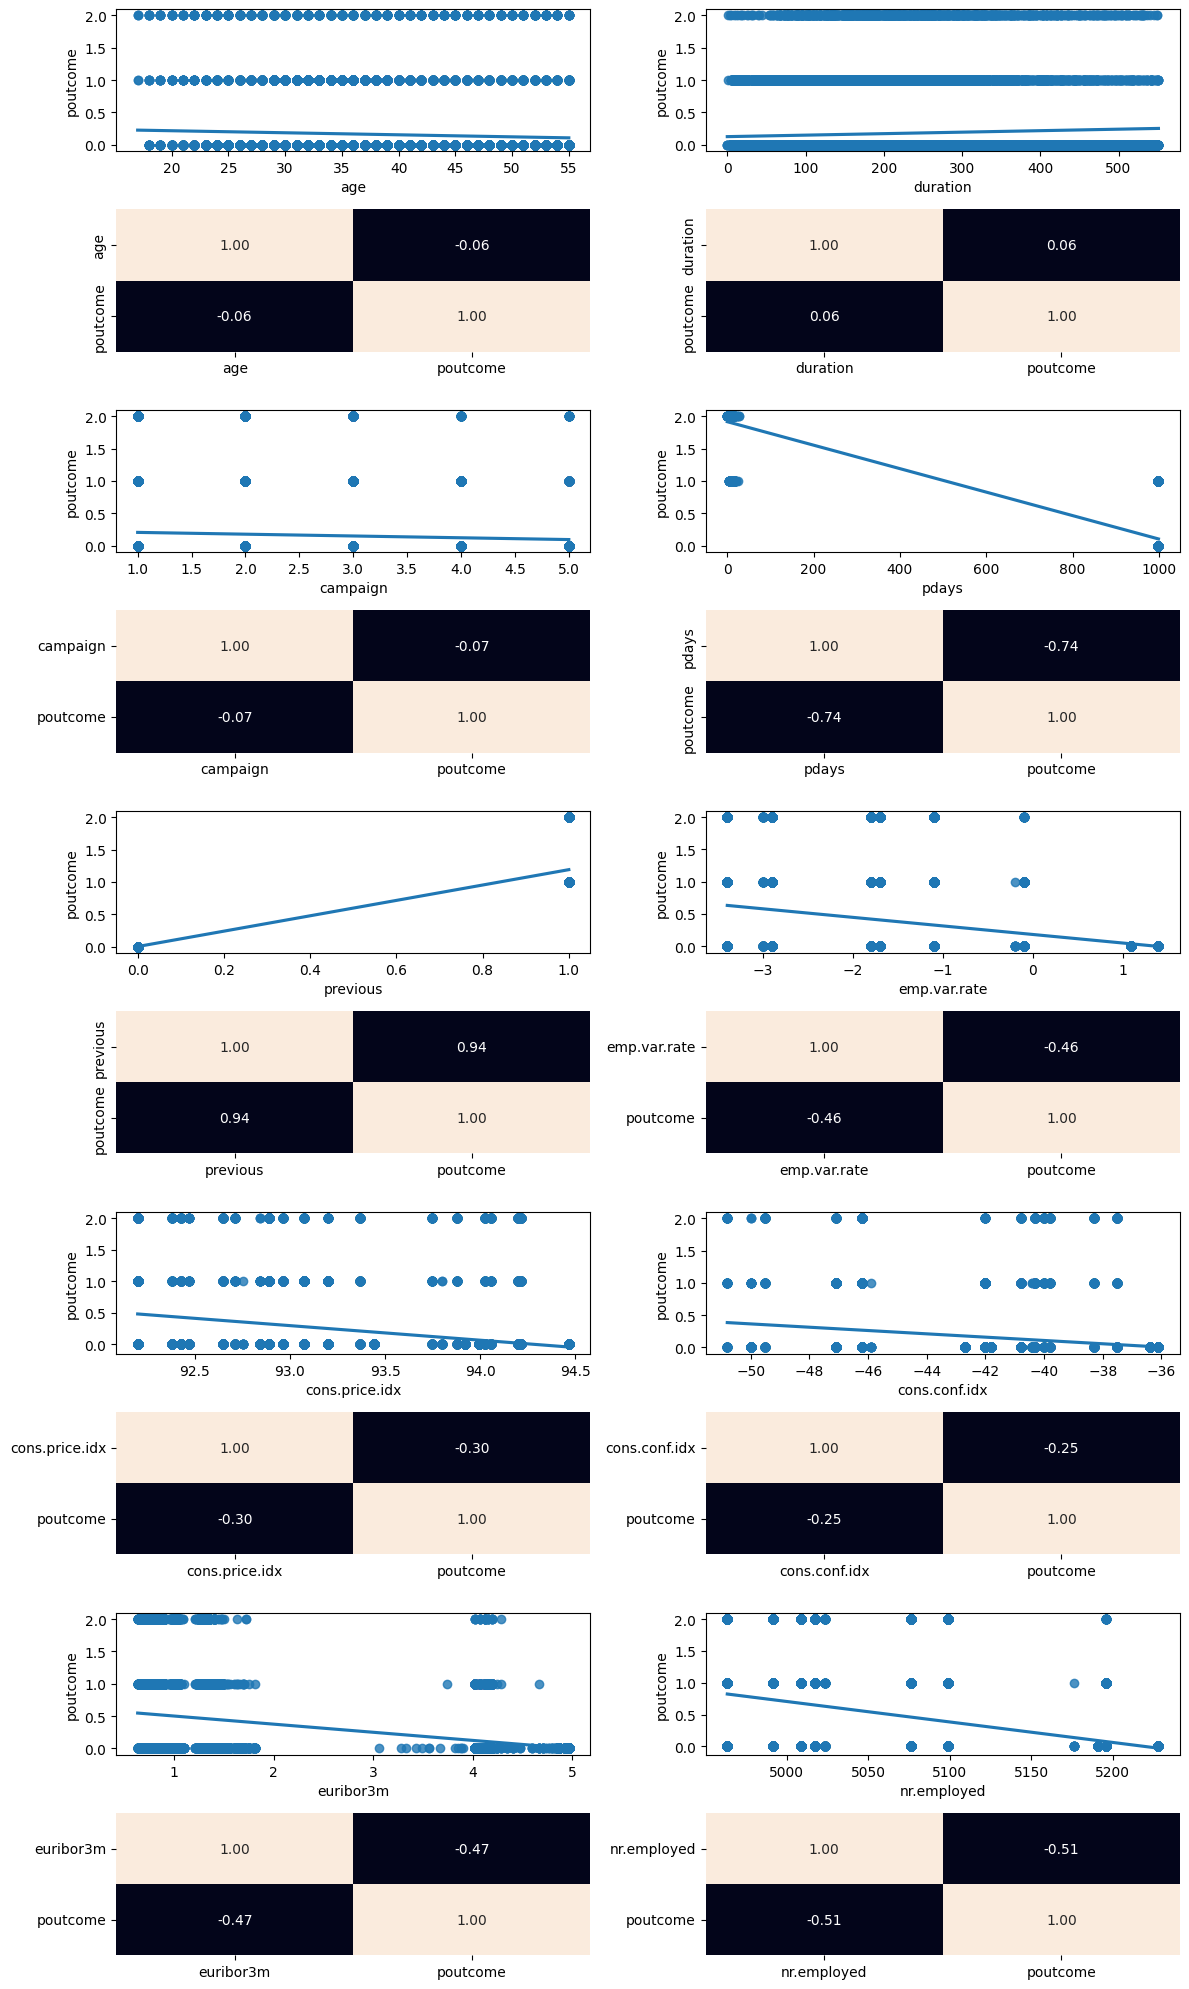

In [39]:
plot_numerical_analisis("poutcome", numerical_column, column_info=True)

Sobre los datos de `poutcome` (Resultado de la campaña de marketing anterior) si muestra relación con varios datos:
* `pdays`: Los resultados de campaña exitosos (success) tienen valores mas altos indicado que han sido contactado mas veces
* `previous`: Los número de contactos realizados durante la campaña anterior al cliente tambien tubieron valores mas altos cuando resulto una campaña exitosa.

    y_n    y
0     0   no
75    1  yes


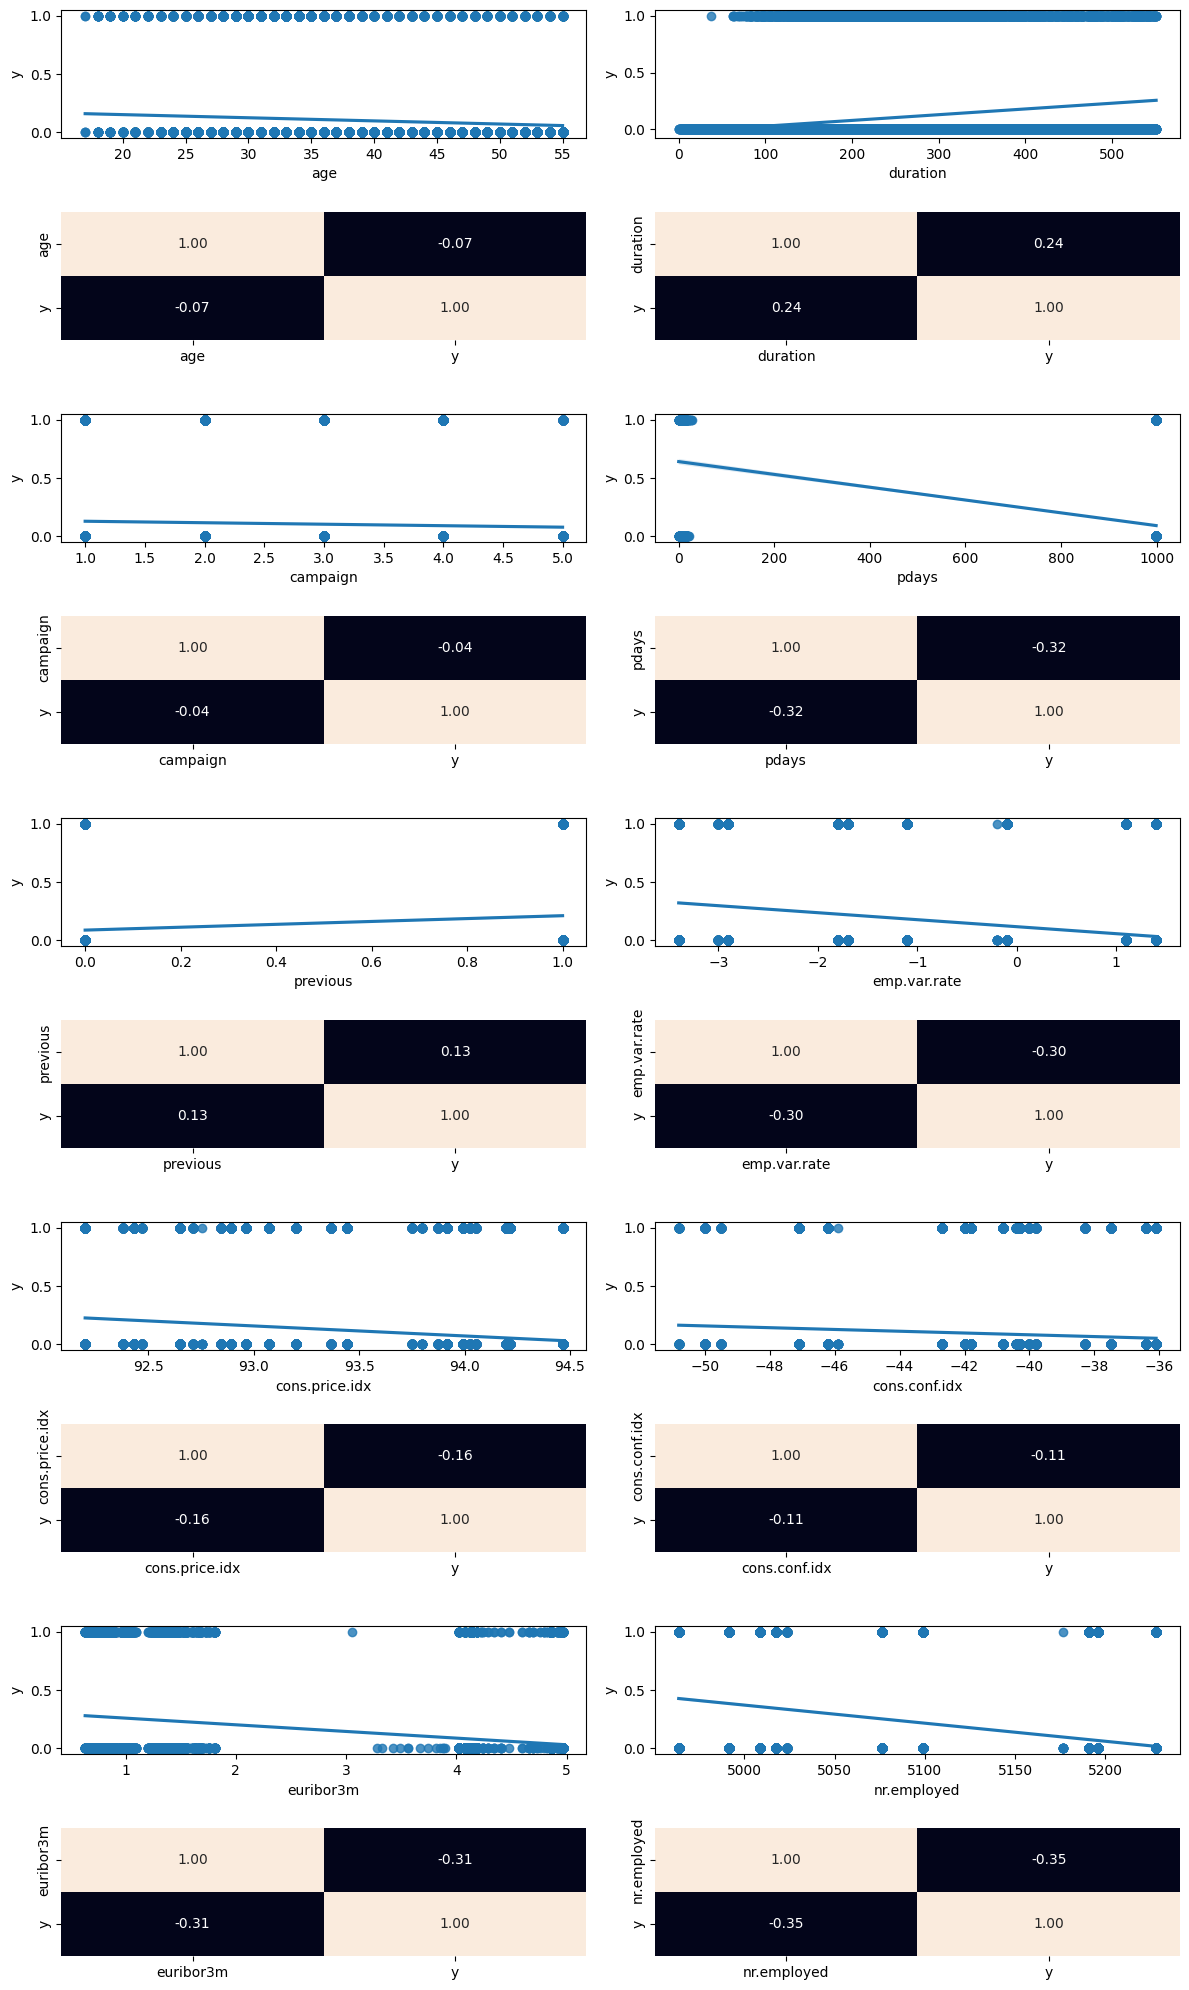

In [40]:
plot_numerical_analisis("y", numerical_column, column_info=True)

* Duración de la llamada (`duration`): Los clientes que aceptan el producto suelen tener llamadas más largas.
* `pdays`: Los clientes que aceptaron suelen haber tenido más contactos previos y campañas anteriores, aunque la diferencia no es tan marcada como en la duración. 


**4.2. Numerico-Numerico Análisis**

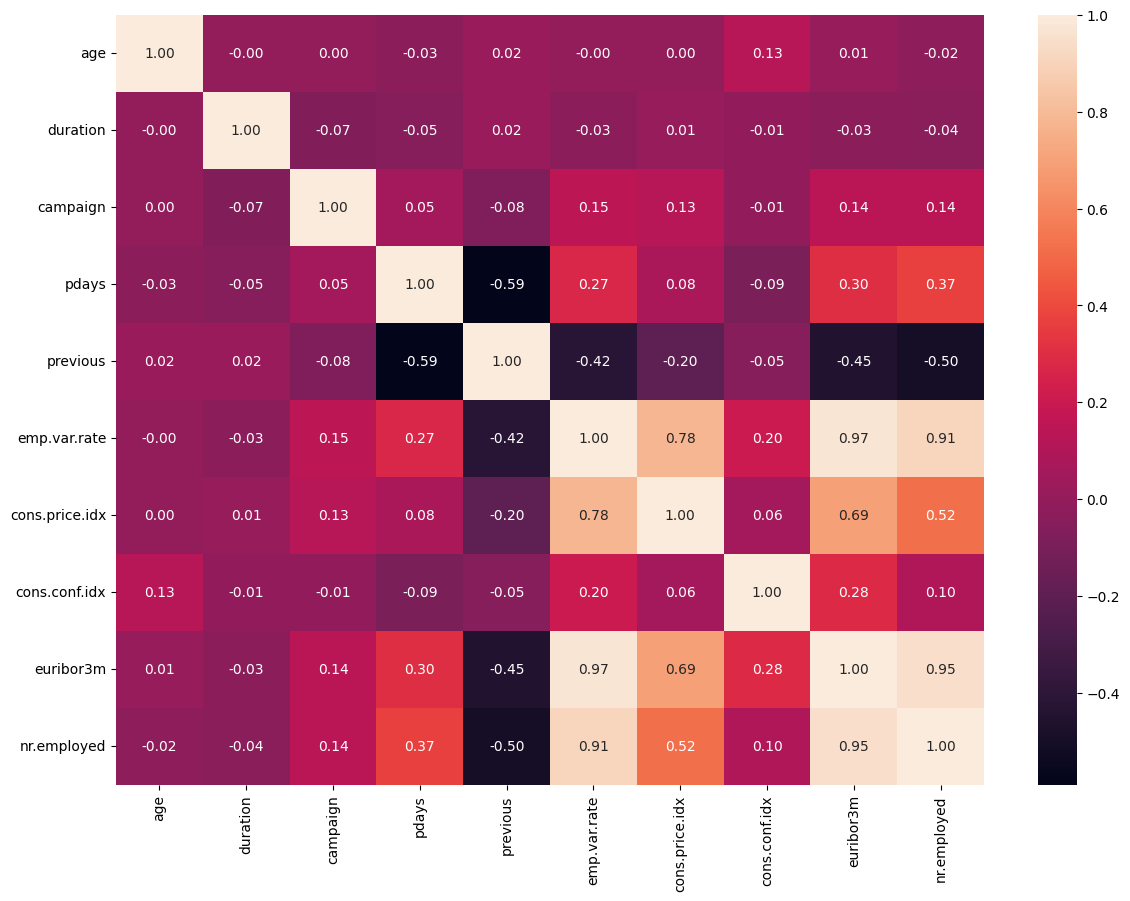

In [34]:
plt.figure(figsize=(14,10))

df_onlyn =  df_copy[numerical_column]

sns.heatmap(df_onlyn.corr().round(2), annot = True, fmt = ".2f")

plt.show()

* La mayoría de numeros de contacto previos `previous` tiende a disminuir el número de días desde el ultimo contacto `pdays`. Los clientes contactados recientemente tienen menos dias de intervalo entre contactos por lógica.
* Hay una relación directa con  `emp.var.rate`,  `euribor3m` y `nr.employed`.
* Hay algunas conexiones destacables entre `cons.price.idx` y `emp.var.rate`, `cons.price.idx` y `euribor3m`, así como entre `cons.price.idx` y `nr.employed`.
* Existe una correlación negativa moderada entre `previous` y `nr.employed` (-0.5): a mayor número de contactos previos, suele haber un menor número de empleados. Tambien se aplica la misma logica de previous con `euribor3m`.

**4.3. Categorico-Categorico Análisis**

In [46]:
def plot_categorical_analisis(column1, column2):
    fig, axis = plt.subplots(1, 1, figsize=(15, 5))

    sns.countplot(ax=axis, data=df_copy, x=column1, hue=column2)

    plt.tight_layout()
    plt.show()

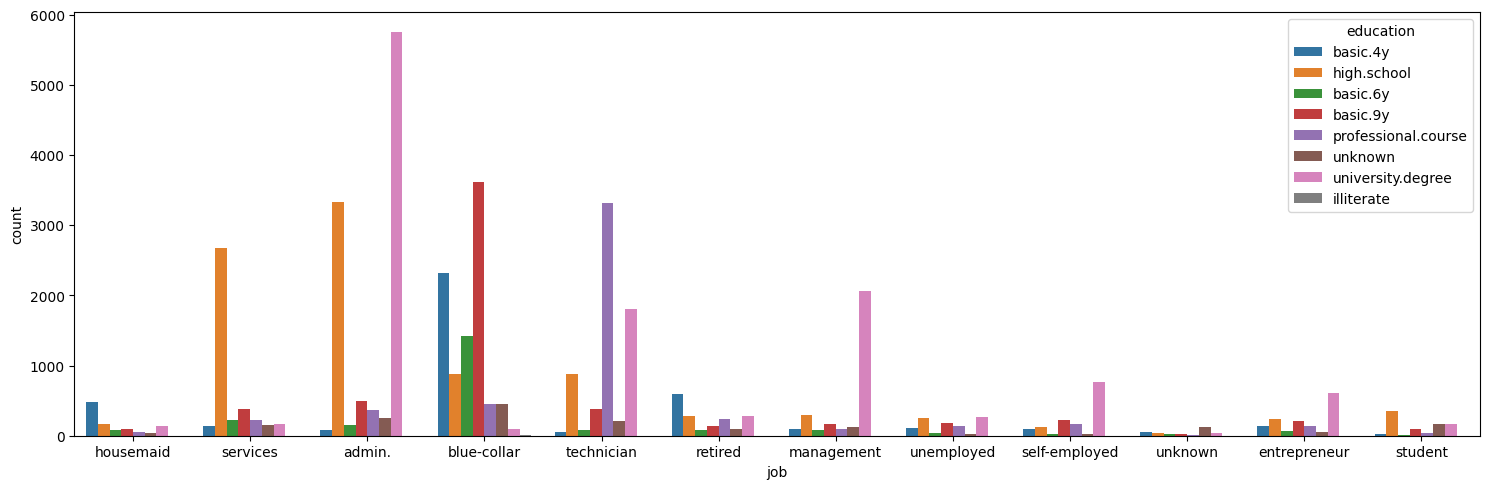

In [49]:
plot_categorical_analisis("job", "education")

Esta correlación sirve para entender la situación de educacion y trabajo de los clientes, como se puede ver la mayoria de administradores son tambien graduados universitarios, tecnicos han hecho cursos profesionales y los obreros han cursado hasta 9no año.

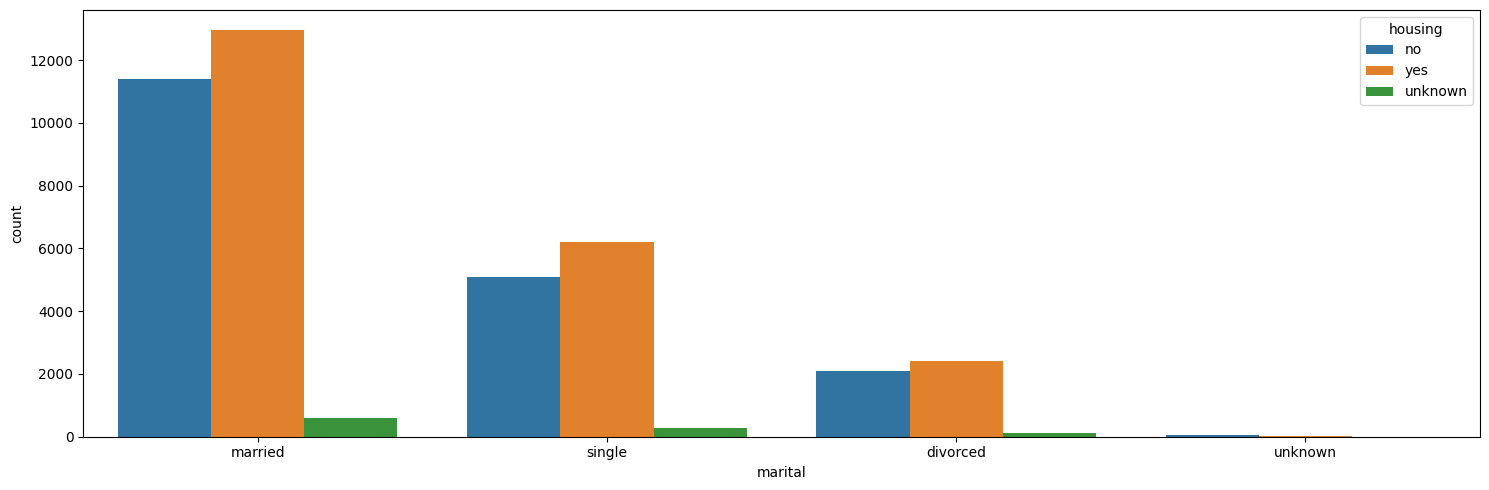

In [50]:
plot_categorical_analisis("marital", "housing")

Se puede observar que la mayoría de clientes que estan casados tienen un préstamo de vivienda duplicando a los solteros y cuadriplicando a los divorciados. La misma relación se da a los que no la tienen, aunque tambien muestra que el amyor conjunto es de clientes casados.

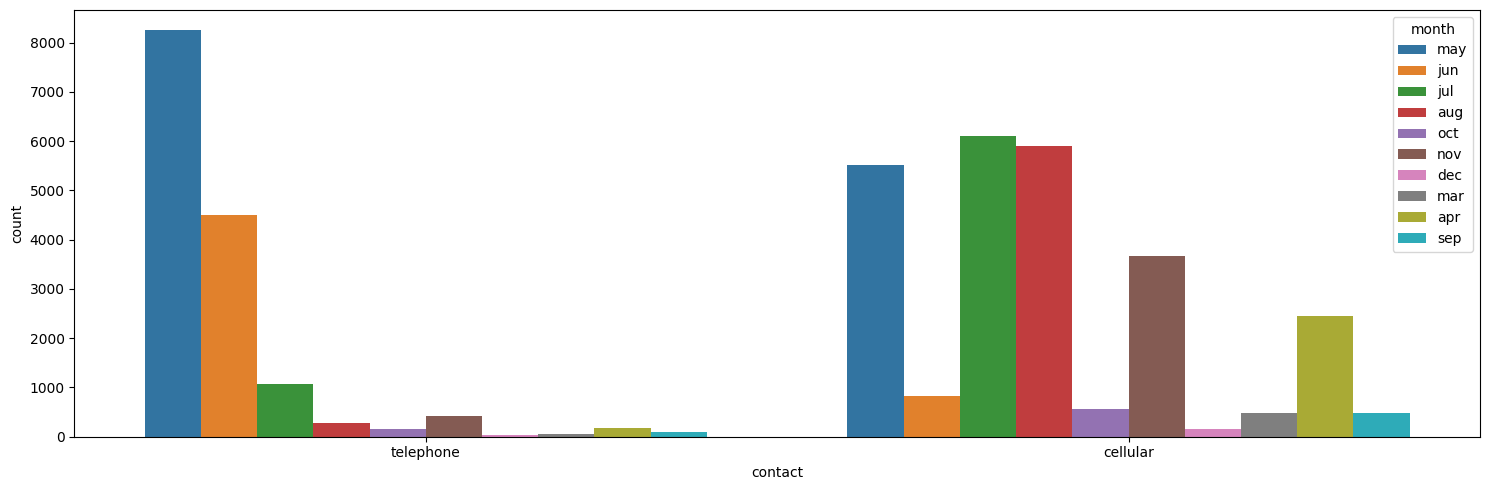

In [ ]:
plot_categorical_analisis("contact", "month")

La mayoría de contactos se han hecho en mayo por telefono, a partir de ahi a lo largo de meses de verano se han hecho mas contacto pot medio de móvil.

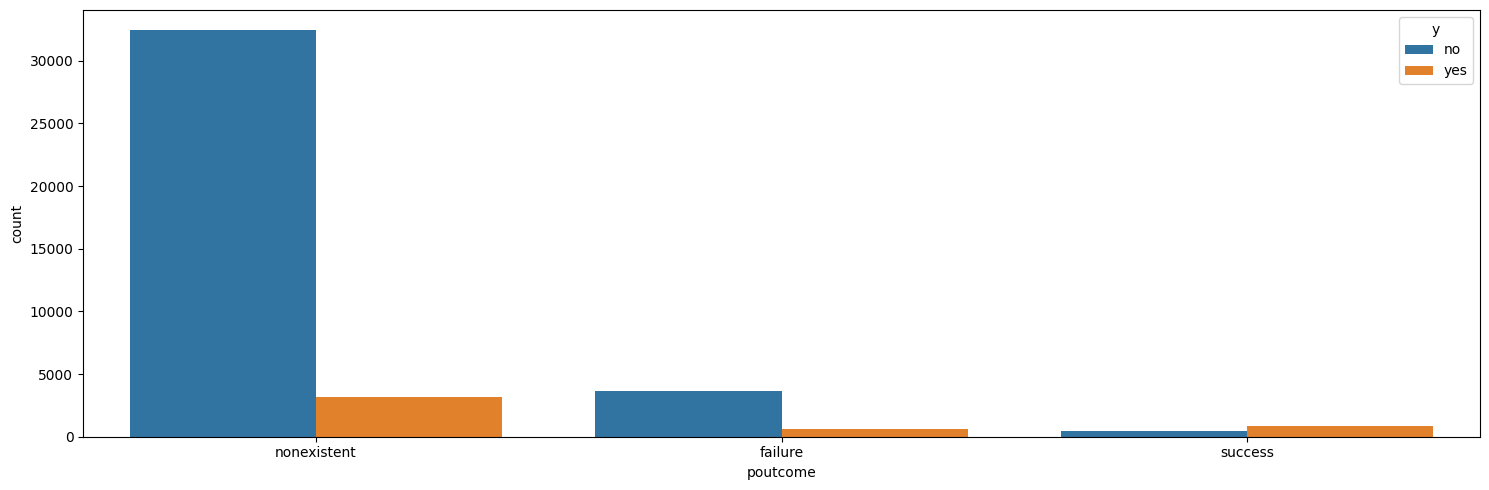

In [53]:
plot_categorical_analisis("poutcome", "y")


Existe una aplastante mayoría en los datos de la campaña de marketing anterior dando resultados no existentes y señalando que los clientes no han contratado un depósito a largo plazo

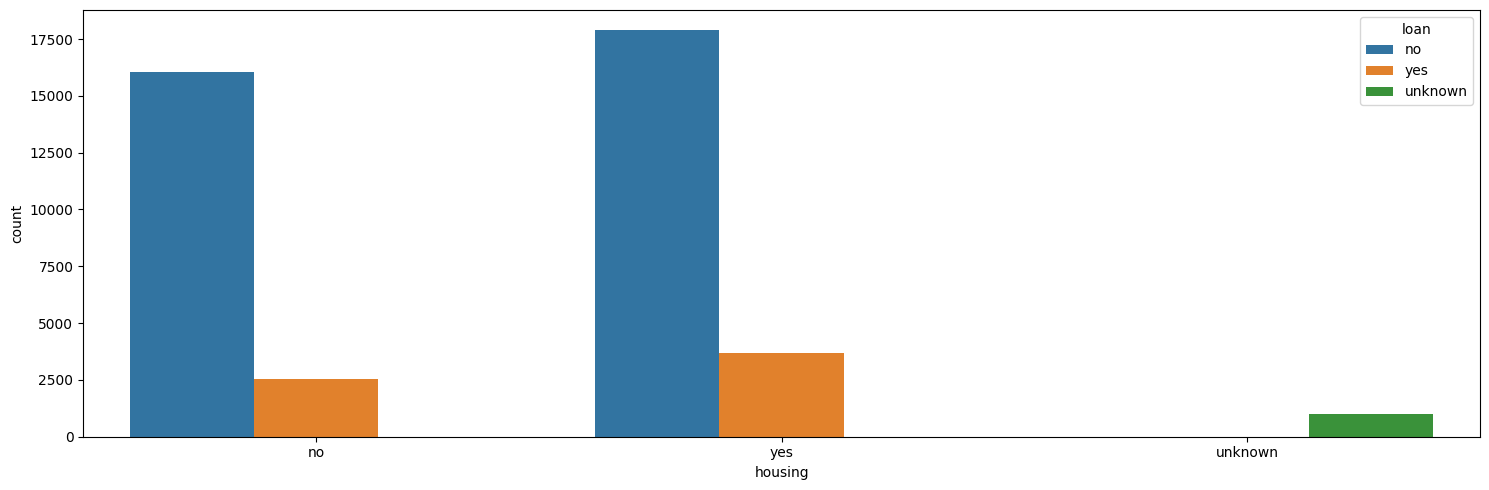

In [54]:
plot_categorical_analisis("housing", "loan")

Los que tienen un préstamo de vivienda no tienen préstamo personal, y es mas probable que no tengan ningun tipo de préstamo

**4.4. Combinación de clases predictoras**

In [57]:
def plot_combination_predictoras(categ1, categ2, numerica):
    fig, axis = plt.subplots(1, 1, figsize=(15, 5))

    sns.barplot(ax=axis, data = df_copy, x = categ1, y = numerica, hue = categ2)

    plt.tight_layout()
    plt.show()

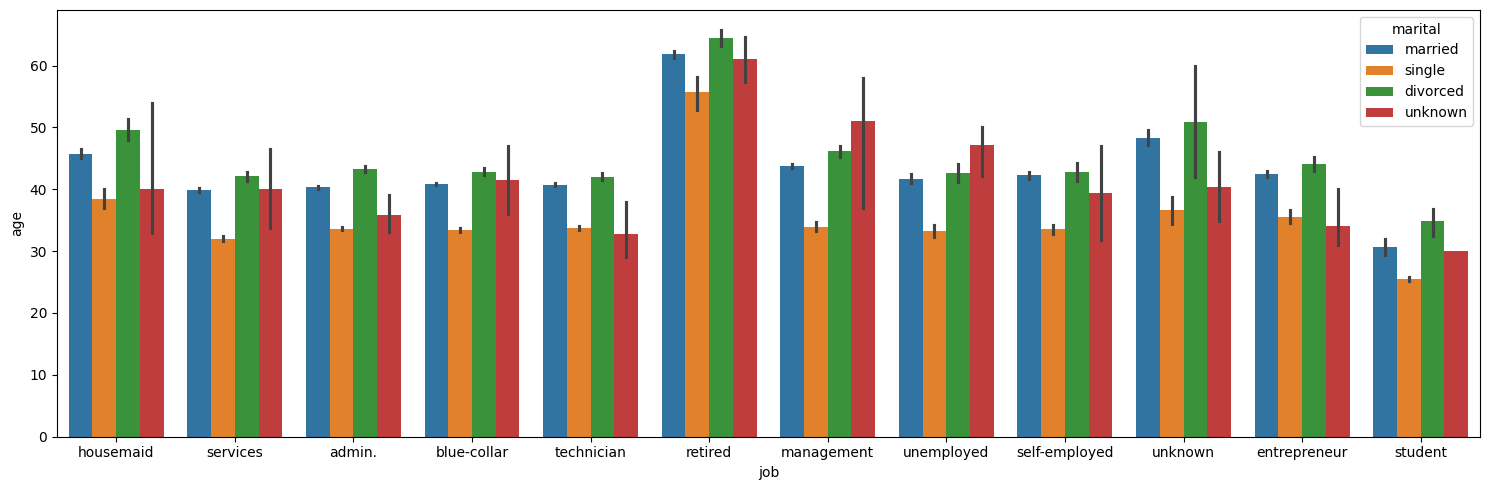

In [62]:
plot_combination_predictoras("job", "marital", "age")


Se puede ver como es que hay relacion entre las edades y los trabajos, los estudiantes son mas jovenes y los returados mayores. Además los clientes casados suelen ser mayores en doso los trabajos, aunuqe destaca varios picos y variaciones de divorciados en cada grupo.

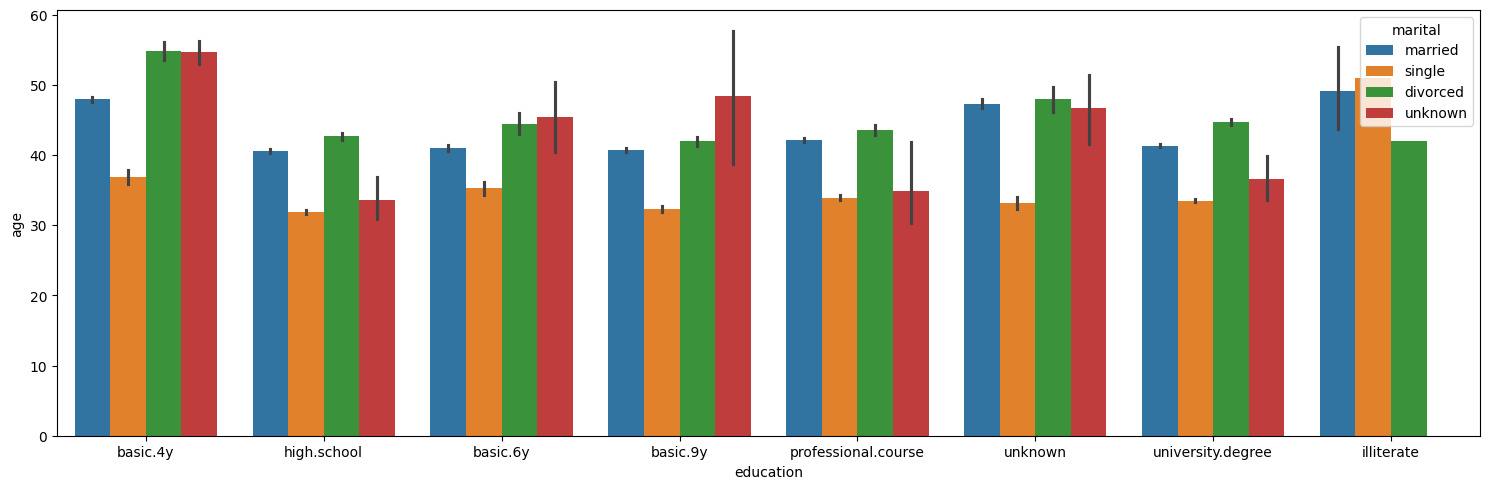

In [63]:
plot_combination_predictoras("education", "marital", "age")


La edad y los cursos tienen una relacion normal, los casados y divorciados tienden a ser mayores en cada nivel educativo. Tambiñen se ve que los solteros son los grupos mas jovenes de cada nivel educativo. Se restalta un gran grupo de analfabetas de edad avanzada

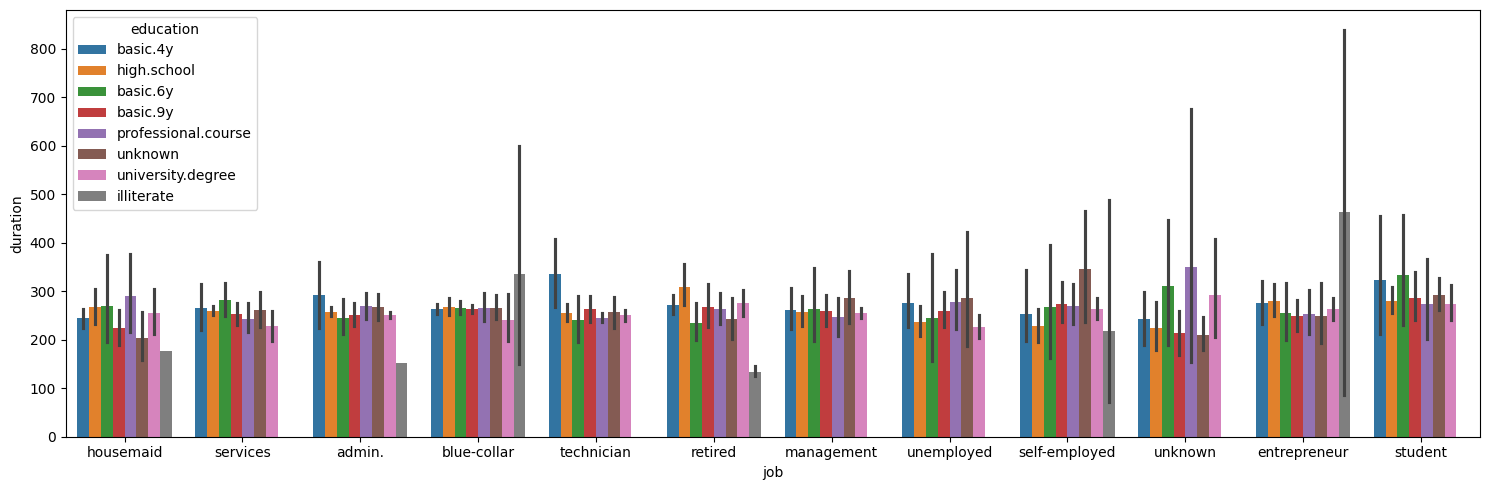

In [64]:
plot_combination_predictoras("job", "education", "duration")


La duración media varia segun el tipo de trabajo y nivel educatuvo pero se ve variaciones enormes entre obreros o empresarios que estan en el grupo de analfabetas. También los desempleados tienen llamadas mas cortas.

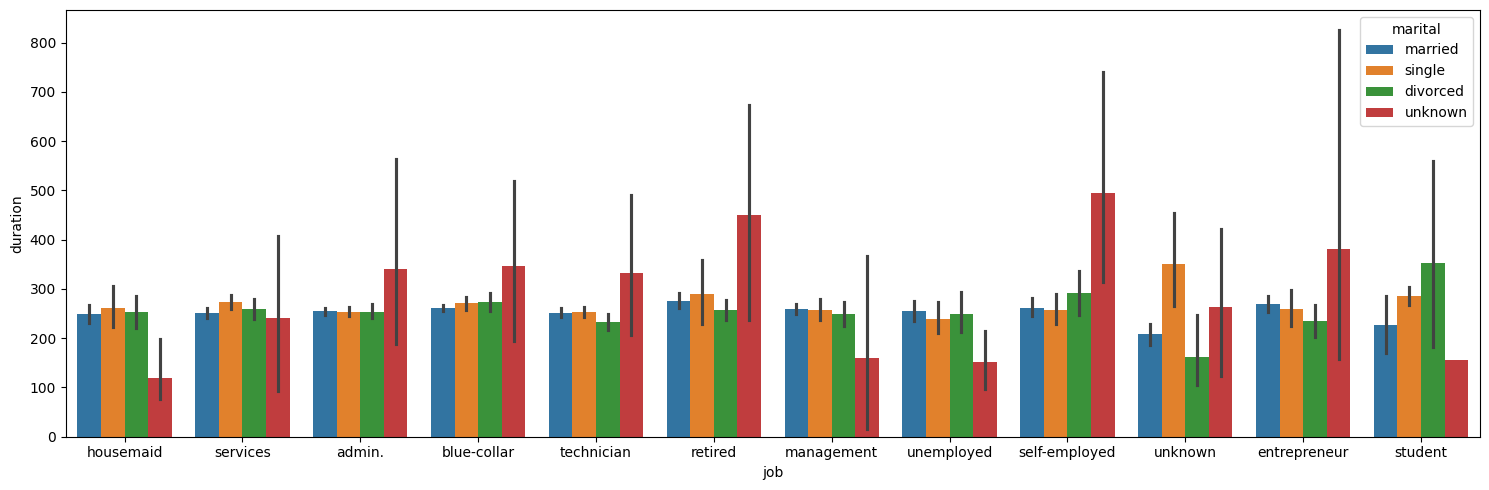

In [65]:
plot_combination_predictoras("job", "marital", "duration")


Las personas en une estado civil desconocido son quienes tienen mas variación en la duración de las llamadas, respecto a los grupos de trabajo se mantienen bastante a media pero los de trabajo desconocido tienen llamadas mas cortas.

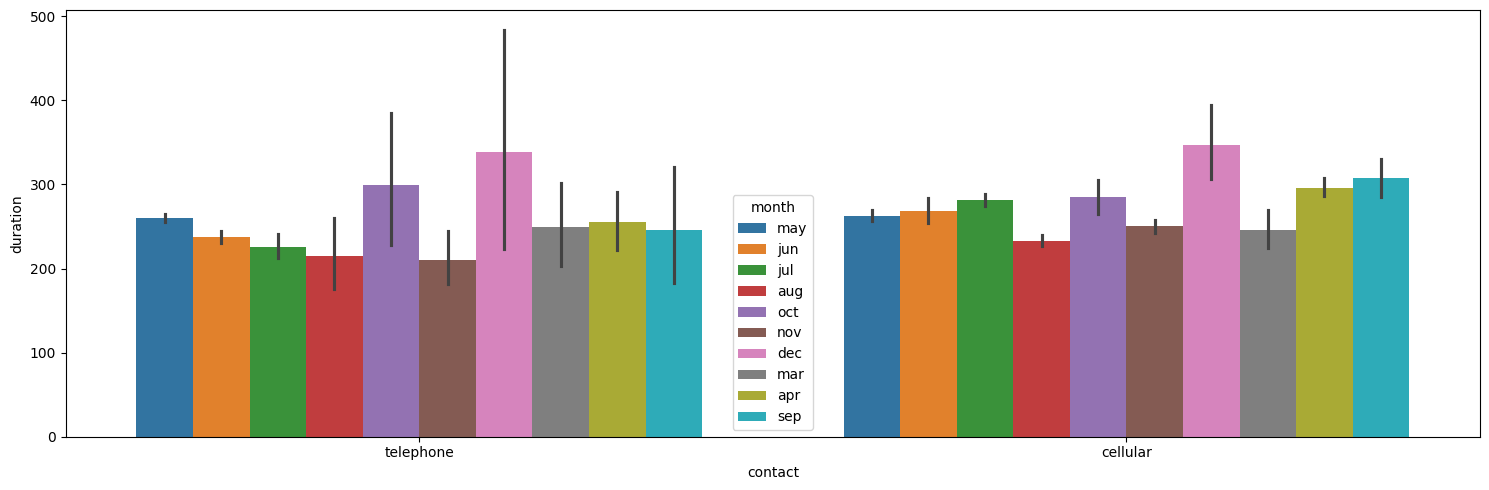

In [66]:
plot_combination_predictoras("contact", "month", "duration")


las llamadas de mayor duración se llevaron a cabo en diciembre tanto en telefono como movil, se ve que en meses de verano se hacen llamadas de mas duración por móvil.

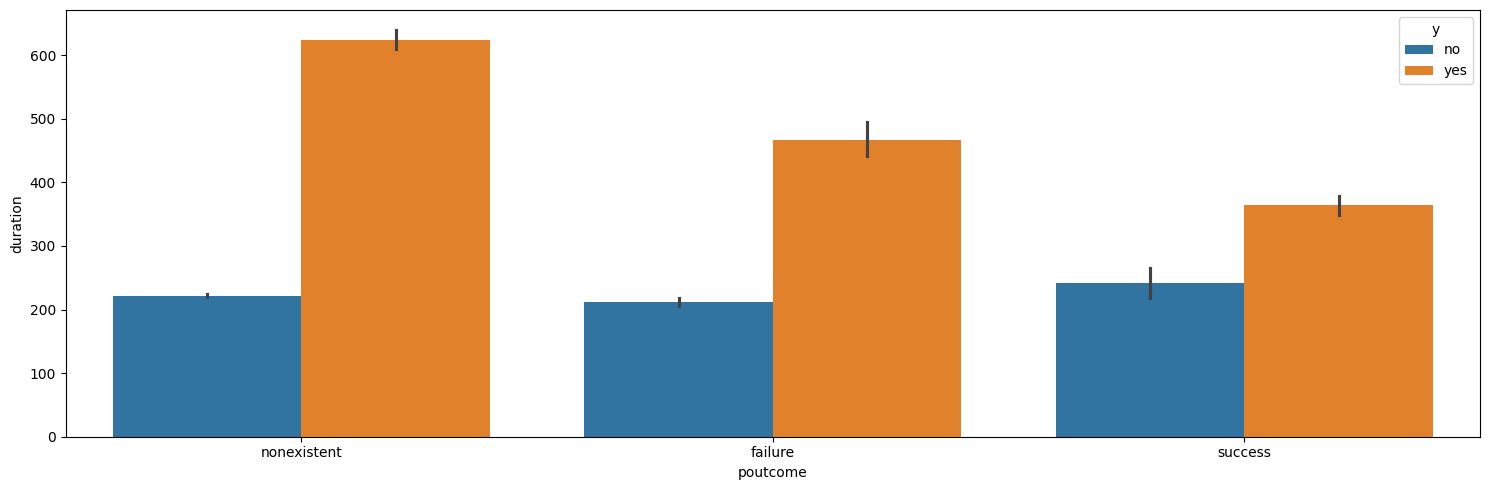

In [67]:
plot_combination_predictoras("poutcome", "y", "duration")

El resultado de la campaña anterior y la actual estan relacionadas. Los clientes que contratan un deposito a largo plazo tienen llamadas mas duraderas en cualquier caso de campaña de marketing anterior, se tiene mas registro de los casos no existentes pero en los casos que fallaron se ve que si hivo deposito como contraste.

**4.4. Codificación de valores categóricos y almacenamiento de archivos JSON**

In [9]:
df_num_total = df.copy()
lista_cambios = []

for col in df_num_total.columns:
    if df_num_total[col].dtype == 'object':
        df_num_total[f"{col}_n"] = pd.factorize(df_num_total[col])[0]
        lista_cambios.append(col)
        print(df_num_total[[f"{col}_n", col]].drop_duplicates())

print(f"Las siguientes columnas fueron convertidas a numéricas: {lista_cambios}")

     job_n            job
0        0      housemaid
1        1       services
3        2         admin.
7        3    blue-collar
8        4     technician
15       5        retired
19       6     management
20       7     unemployed
27       8  self-employed
29       9        unknown
41      10   entrepreneur
205     11        student
    marital_n   marital
0           0   married
8           1    single
13          2  divorced
40          3   unknown
      education_n            education
0               0             basic.4y
1               1          high.school
3               2             basic.6y
5               3             basic.9y
6               4  professional.course
7               5              unknown
25              6    university.degree
5393            7           illiterate
       default_n  default
0              0       no
1              1  unknown
21580          2      yes
    housing_n  housing
0           0       no
2           1      yes
29          2  unk

In [10]:
diccionarios_codificacion = {}

for col in lista_cambios:
    col_n = f"{col}_n"
    # Para cada valor de columna se asocia un valor numerico único
    mapeo = {row[col]: row[col_n] for index, row in df_num_total[[col, col_n]].drop_duplicates().iterrows()}
    diccionarios_codificacion[col] = mapeo

for col, mapeo in diccionarios_codificacion.items():
    print(f"Diccionario para {col}:")
    print(mapeo)
    print()



Diccionario para job:
{'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}

Diccionario para marital:
{'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3}

Diccionario para education:
{'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}

Diccionario para default:
{'no': 0, 'unknown': 1, 'yes': 2}

Diccionario para housing:
{'no': 0, 'yes': 1, 'unknown': 2}

Diccionario para loan:
{'no': 0, 'yes': 1, 'unknown': 2}

Diccionario para contact:
{'telephone': 0, 'cellular': 1}

Diccionario para month:
{'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'mar': 7, 'apr': 8, 'sep': 9}

Diccionario para day_of_week:
{'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}

Diccionario para poutcome:
{'nonexistent': 0, 'failure': 1, 'success': 2}



In [11]:
for col, mapeo in diccionarios_codificacion.items():

    # Escritura
    with open(f"../data/processed/{col}_n.json", "w") as f:
        json.dump(mapeo, f)

    # Lectura
    with open(f"../data/processed/{col}_n.json", "r") as f:
        mapeo_loaded = json.load(f)
    
    #Convierte los balores categóricos a su valor numerico correspondiente usando el diccionario
    df_num_total[col + "_n"] = df_num_total[col].apply(lambda x: mapeo_loaded[x] if not pd.isna(x) else np.nan)

df_num_total

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,4,0,1,0,1,5,4,0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,6,0,1,0,1,5,4,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,4,0,0,0,1,5,4,0,1


**4.5. Análisis final de correlaciones**


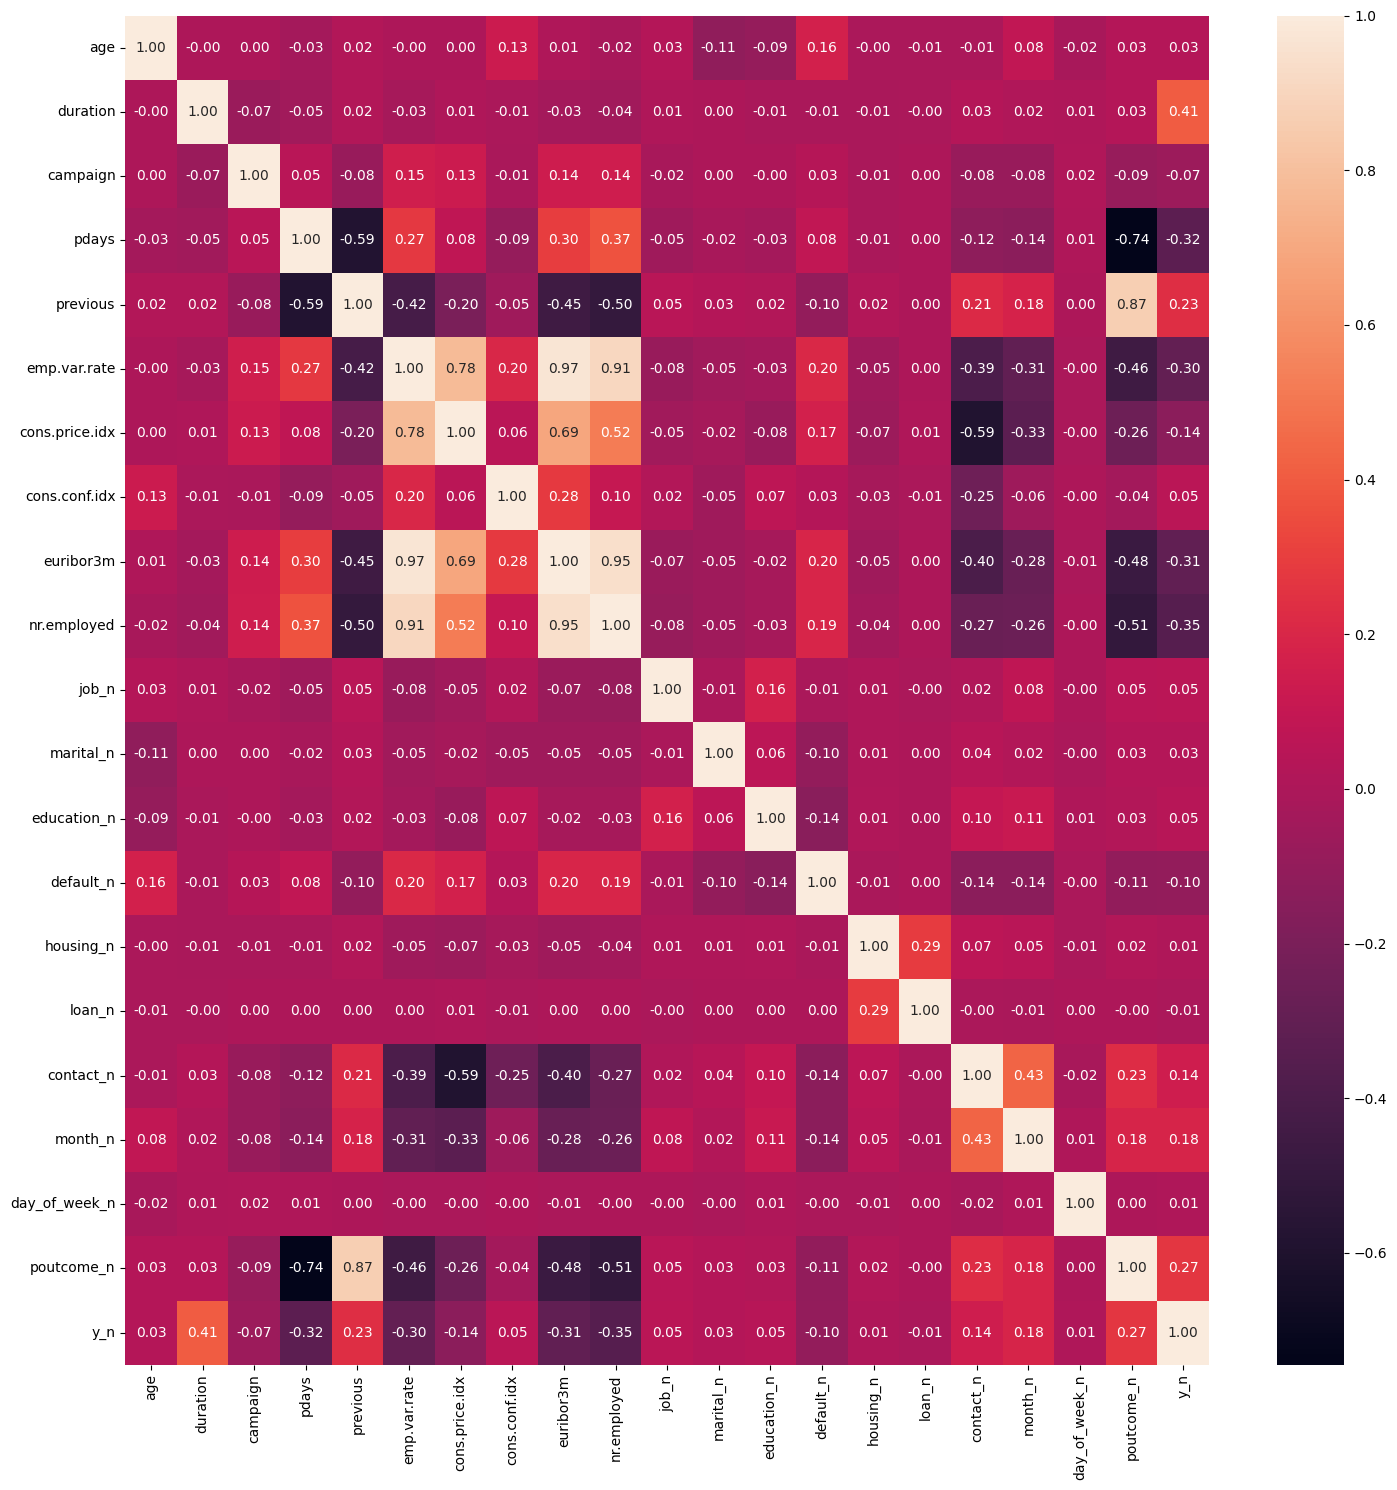

In [12]:
fig, axis = plt.subplots(figsize = (15, 15))

num_list = [col for col in df_num_total.columns if df_num_total[col].dtype == "int64" or df_num_total[col].dtype == "float64"]
df_enc = df_num_total[[col for col in df_num_total.columns if col in num_list]]
sns.heatmap(df_num_total[num_list].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusiones:
* Se mantienen las observaciones del mapa de calor resutlante del apartado de analisis de variables numéricas
* El resultado de la campaña de marketing anterior `poutcome` parece tener una relación directa positiva con el número de contactos realizados durante la campaña anterior al cliente `previous` y negativa con el número de días que transcurrieron desde la última campaña hasta que fue contactado `pdays`, ademas de algunas conexiones con `nr.employed`, `euribor3m` y `emp.var.rate`
* Parece haber una relaciones negativas entre el tipo de comunicación `contact` y el índice de precios al consumidor `cons.price.idx` y `euribor3m`. Y una correlacion positiva con el último mes que se contactó `month`
* El TARGET que es sobre si el cliente contrata un depósito a largo plazo o no `y` tiene una relación directa con la duración de las llamadas `duration` y negativas con `pdays`, `emp.var.rate`, `euribor3m` y `nr.employed`

### 5.5. Ingeniería de características
**5.1. Análisis de outliers**

In [13]:
df_enc.corr().describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.057690,0.059580,0.055484,-0.001720,0.012529,0.111978,0.080440,0.063607,0.112547,0.096229,...,0.035679,0.056073,0.056825,0.056625,0.060820,-0.000199,0.035697,0.047740,0.002224,0.041577
std,0.224488,0.234935,0.229550,0.344188,0.382510,0.448278,0.378529,0.240169,0.449847,0.435441,...,0.225587,0.227521,0.246179,0.227743,0.224345,0.328502,0.289911,0.218375,0.403703,0.297196
min,-0.114983,-0.071699,-0.086083,-0.744679,-0.587514,-0.457197,-0.591474,-0.251614,-0.478687,-0.509597,...,-0.114983,-0.144138,-0.144138,-0.066337,-0.009311,-0.591474,-0.330558,-0.019583,-0.744679,-0.354678
25%,-0.007021,-0.014778,-0.066357,-0.091342,-0.102416,-0.083007,-0.079517,-0.041728,-0.072497,-0.084981,...,-0.048931,-0.025485,-0.102416,-0.011051,-0.004391,-0.135238,-0.135025,-0.004401,-0.108159,-0.099352
50%,0.000857,-0.000866,0.002269,-0.017635,0.020640,-0.004401,0.000857,-0.000099,-0.005552,-0.017725,...,0.001220,0.008519,-0.004286,-0.001923,0.001298,-0.004391,0.018180,-0.000099,0.021433,0.026302
75%,0.030399,0.018180,0.052584,0.078889,0.051348,0.203263,0.127836,0.071758,0.277686,0.189845,...,0.026302,0.063774,0.164965,0.021002,0.003055,0.095383,0.114478,0.008519,0.049070,0.144773
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las siguientes columnas continuas fueron identificadas: ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age', 'duration', 'campaign', 'pdays', 'month_n']


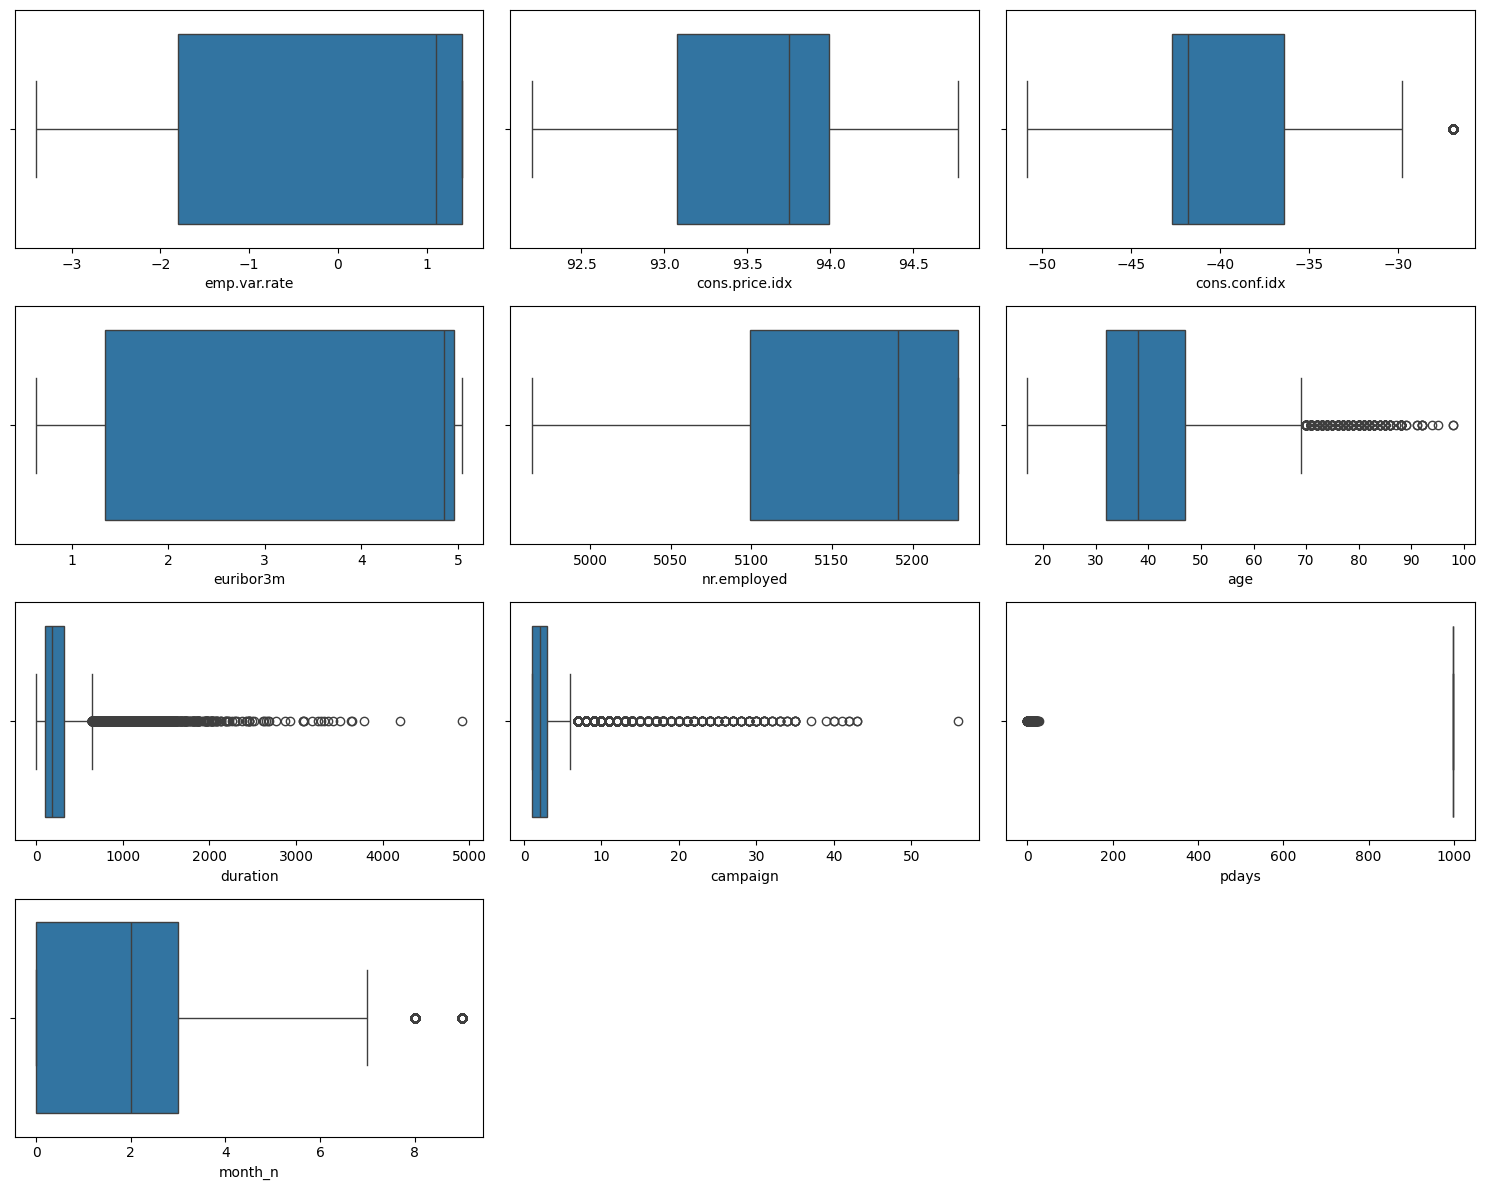

In [14]:
lista_col = list(df_enc.select_dtypes('float64')) + list(df_enc[['age', 'duration', 'campaign', 'pdays','month_n']])
print(f"Las siguientes columnas continuas fueron identificadas: {lista_col}")
n = len(lista_col)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(df_enc[lista_col]):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=df_enc, x=col)

# Oculta subplots vacíos
for idx in range(len(lista_col), n_rows * n_cols):
    row = idx // n_cols
    col_pos = idx % n_cols
    fig.delaxes(axis[row, col_pos])

plt.tight_layout()
plt.show()

* Revisamos los datos que son float ya que sin los que tienden a tener mas outliers y tambien los valores de int que dan datos suficientes para ser un gran conjunto, tambien ``mont_n` que viene de un categorico ya que esta medido entre meses ordenados y se puede seguir una secuencia con media.
* Hay puntos atípicos en `cons.conf.idx`, `age`, `duration`, `campaign`, `pdays` y `month_n`

In [15]:
# Crear una copia para eliminar outliers
df_enc_no = df_enc.copy()

In [16]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [17]:
# outliers con y sin negativos
f_outliers_with_neg = []
f_outliers_no_neg = []

for each in lista_col:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

In [18]:
df_enc.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,0.169904,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,0.455754,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [19]:
df_enc_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.939485,234.997317,2.275274,999.0,0.172963,0.759126,93.575664,0.0,3.621291,5167.035911,...,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.197388,1.979581,0.169904,0.112654
std,10.129367,177.353309,1.550510,0.0,0.494901,0.651396,0.578840,0.0,1.734447,72.251528,...,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.301538,1.411514,0.455754,0.316173
min,17.000000,0.000000,1.000000,999.0,0.000000,0.000000,92.201000,0.0,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.0,0.000000,0.000000,93.075000,0.0,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.0,0.000000,1.100000,93.749000,0.0,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.0,0.000000,1.400000,93.994000,0.0,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,69.500000,644.500000,6.000000,999.0,7.000000,1.400000,94.767000,0.0,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,7.500000,4.000000,2.000000,1.000000


**5.2. Dividir el train/test de marcos de datos**

In [20]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train.to_csv(f'../data/processed/X_train_{reference}.csv', index=False)
    X_test.to_csv(f'../data/processed/X_test_{reference}.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
    
    return X_train, X_test, y_train, y_test

In [21]:
# Separar el DataFrame original 
X_train_con_outliers, X_test_con_outliers, y_train, y_test = split('y_n', df_enc, 'with_outliers')
X_train_sin_outliers, X_test_sin_outliers, _, _ = split('y_n', df_enc_no, 'without_outliers')

### 6. Procesamiento de Datos

**6.1. Normalización**

In [22]:
#Retiramos el target de la lista de columnas de estudio
# Esto es necesario para que no se incluya en el entrenamiento y pruebas posteriores
column_list = list(df_enc.columns.drop('y_n'))

In [23]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers) #Recuerda que es el entrenamiento

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers) #Se aplica la normalización
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = column_list) #Se crea un nuevo DataFrame con los datos normalizados

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers) #Lo mismo para el test
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = column_list)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers) #Se repite el proceso pero sin outliers
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_norm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
5402,-0.481846,-0.310570,-0.204850,0.195582,-0.349924,0.643045,0.720048,0.883266,0.707515,0.326210,2.580460,-0.730796,-1.041906,-0.515887,-1.053735,-0.437917,-1.320521,-0.927900,1.430057,-0.373227
40128,-1.730916,-0.009892,0.162686,0.195582,1.674657,-1.140950,1.101751,0.039589,-1.616536,-2.444456,-1.088801,0.704315,0.331454,-0.515887,-1.053735,-0.437917,0.757277,-0.101556,-0.694844,1.818898
11388,-0.193599,-0.834829,0.897757,0.195582,-0.349924,0.834187,1.533541,-0.284902,0.766454,0.841715,-0.273410,-0.730796,0.789241,-0.515887,0.793693,-0.437917,-1.320521,-0.514728,1.430057,-0.373227
16361,-1.442669,0.707109,-0.204850,0.195582,-0.349924,0.834187,0.588783,-0.479597,0.768765,0.841715,-0.273410,0.704315,-0.126332,1.936287,0.793693,-0.437917,0.757277,-0.101556,0.013457,-0.373227
23389,-0.289682,-0.584264,0.530222,0.195582,-0.349924,0.834187,-0.229892,0.948164,0.769343,0.841715,0.134286,-0.730796,1.247028,-0.515887,-1.053735,-0.437917,0.757277,0.311616,0.013457,-0.373227


**6.2. Escalado Mínimo-Máximo**

In [24]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = column_list)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = column_list)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
5402,0.222222,0.036194,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0.909091,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,1.00,0.0
40128,0.061728,0.052054,0.036364,1.0,0.142857,0.354167,0.784879,0.439331,0.045568,0.105860,0.090909,0.333333,0.571429,0.0,0.0,0.0,1.0,0.222222,0.25,0.5
11388,0.259259,0.008540,0.072727,1.0,0.000000,1.000000,0.882307,0.376569,0.980503,1.000000,0.272727,0.000000,0.714286,0.0,0.5,0.0,0.0,0.111111,1.00,0.0
16361,0.098765,0.089874,0.018182,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,1.000000,0.272727,0.333333,0.428571,0.5,0.5,0.0,1.0,0.222222,0.50,0.0
23389,0.246914,0.021757,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000,0.363636,0.000000,0.857143,0.0,0.0,0.0,1.0,0.333333,0.50,0.0


**6.3. Guardado en archivos xlsx**

In [25]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", "X_train_con_outliers_norm", "X_train_sin_outliers_norm", "X_train_con_outliers_scal", "X_train_sin_outliers_scal",
         "X_test_con_outliers", "X_test_sin_outliers", "X_test_con_outliers_norm", "X_test_sin_outliers_norm", "X_test_con_outliers_scal", "X_test_sin_outliers_scal",
         "y_train", "y_test"]
for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

In [26]:
with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 7. Machine Learning

**7.1. Decisión de DataSet**

In [27]:
train, test = [], []

for var in lista:
    df = pd.read_excel(f"../data/processed/{var}.xlsx")
    if "train" in var:
        train.append((var, df))
    elif "test" in var:
        test.append((var, df))

In [28]:
results = []
models = []
datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

for name, dataset in datasets:
  model = LogisticRegression(max_iter=1000) # Modelo base
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))
  models.append((name, model))


best_index = results.index(max(results))
print("Resultados:", results)
print("Mejor accuracy:", max(results))
print("Mejor dataset:", datasets[best_index][0])

best_dataset = datasets[best_index][1]

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

Resultados: [0.9087405159332321, 0.9035204855842185, 0.9087101669195751, 0.9040971168437025, 0.9085280728376328, 0.9038543247344462]
Mejor accuracy: 0.9087405159332321
Mejor dataset: X_train_con_outliers


* Dataset ganador: X_train_con_outliers

In [29]:
hyperparams = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "dual": [True, False],
    "C": [1.0, 0.5, 0.05, 0.10, 1.5, 2.0]
}

In [30]:
grid = GridSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy")
grid.fit(best_dataset, y_train)
grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

{'C': 0.05, 'dual': False, 'penalty': 'l2'}

In [31]:
grid = RandomizedSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy", n_iter = 20, random_state = 40)
grid.fit(best_dataset, y_train)
grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-pa

{'penalty': 'l2', 'dual': False, 'C': 0.05}

In [32]:
modelo_definitivo = LogisticRegression(**grid.best_params_, max_iter=1000)
modelo_definitivo.fit(best_dataset, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.05
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
y_pred_train = modelo_definitivo.predict(best_dataset)
y_pred_test = modelo_definitivo.predict(X_test_con_outliers)

In [40]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy en TRAIN: {accuracy_train:.4f}")
print(f"Accuracy en TEST: {accuracy_test:.4f}")

Accuracy en TRAIN: 0.9087
Accuracy en TEST: 0.9119


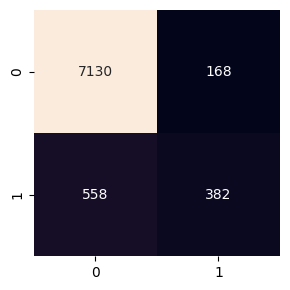

In [42]:
df_cm = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(df_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

* Verdaderos positivos (TP, True positive): Se corresponde con el número `7130` y son los casos en los que el modelo predijo positivo (no supervivencia) y la clase real también es positiva.
* Verdaderos negativos (TN, True negative): Se corresponde con el número `382` y son los casos en los que el modelo predijo negativo (supervivencia) y la clase real también es negativa.
* Falsos positivos (FP, False positive): Se corresponde con el número `558` y son los casos en los que el modelo predijo positivo y la clase real es negativa.
* Falsos negativos (FN, False negative): Se corresponde con el número `168` y son los casos en los que el modelo predijo negativo y la clase real es positiva.